In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Preprocesamiento

En el Notebook Carga_datos.ipynb se ha llevado a cabo una extracción de los datos de las páginas https://es.numbeo.com/coste-de-vida/iniciar-p%C3%A1gina y https://es.numbeo.com/calidad-de-vida/iniciar-p%C3%A1gina, por lo que en este Notebook comenzaremos directamente con su lectura.

### Lectura de datos

#### Calidad de vida: df_quality

In [2]:
import pandas as pd

In [3]:
df_quality = pd.read_csv('inputs/calidad_de_vida.csv')

df_quality.head()

,Puesto,Ciudad,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Índice de Clima,Año
0,NaN,"Canberra, Australia",23698,13266,6447,8185,10265,463,1080,1476,-,2014
1,NaN,"Ottawa, Canadá",21877,13188,7609,6864,8615,490,4000,2246,-,2014
2,NaN,"Fráncfort del Óder, Alemania",21497,13918,7248,6310,9657,507,2875,3129,-,2014
3,NaN,"Zúrich, Suiza",20821,12464,7890,7561,15747,869,2480,1714,-,2014
4,NaN,"Denver, Colorado, Estados Unidos",20594,13398,6040,8259,8210,181,4333,3793,-,2014


#### Coste de vida: df_cost

In [4]:
df_cost = pd.read_csv('inputs/costo_de_vida.csv')

df_cost.head()

,Puesto,Ciudad,Índice de Costo de Vida,Índice de Alquiler,Índice de Costo de Vida más Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año
0,NaN,"París, Francia",12782,9639,11535,11705,11653,3938,2009
1,NaN,"Dublín, Irlanda",12660,8758,11112,15451,13156,5925,2009
2,NaN,"Bruselas, Bélgica",11753,7877,10216,11088,10756,5558,2009
3,NaN,"Berlín, Alemania",11525,3296,8261,9027,7919,5858,2009
4,NaN,"Estocolmo, Suecia",11248,2999,7975,9895,8525,6387,2009


#### Latitudes y longitudes geográficas: df_lon_lat

El fichero de latitudes y longitudes geográficas se ha diseñado manualmente, extrayendo de https://www.antipodas.net/ cada latitud y longitud correspondiente a las capitales europeas.

In [5]:
data = {
    "City": ["Vienna", "Brussels", "Sofia", "Zagreb", "Prague", "Copenhagen", "Tallinn", "Helsinki", "Paris"," Berlin",
                "Athens", "Budapest", "Dublin", "Rome", "Riga", "Vilnius", "Luxembourg", "Amsterdam", "Warsaw", 'Lisbon', "Bucharest",
                "Bratislava","Ljubljana","Madrid", "Stockholm", "Nicosia"],
    "Latitude": [48.20849, 50.8504500, 42.6975100, 45.8144400, 50.0880400, 55.6759400, 59.4369600, 60.1695200,48.8566, 52.5200, 37.9794500,
                47.4980100, 53.3330600, 45.5838300, 56.9460000, 54.6891600, 49.7500000, 52.3740300, 52.2297700, 38.7223,
                44.4322500, 48.1481600, 46.0510800,40.4168, 59.3325800, 35.1666700],
    "Longitude": [16.37208, 4.3487800, 23.3241500, 15.9779800, 14.4207600, 12.5655300, 24.7535300, 24.9354500, 2.3522,
                13.4050, 23.7162200, 19.0399100, 6.2488900, 11.7181900, 24.1058900, 25.2798000, 6.1667000, 4.8896900, 21.0117800, -9.1393,
                26.1062600, 17.1067400, 14.5051300, -3.7038, 18.0649000, 33.3666700]
}

In [6]:
df_lon_lat = pd.DataFrame(data)

df_lon_lat.head()

,City,Latitude,Longitude
0,Vienna,48.20849,16.37208
1,Brussels,50.85045,4.34878
2,Sofia,42.69751,23.32415
3,Zagreb,45.81444,15.97798
4,Prague,50.08804,14.42076


### Tratamiento valores nulos y duplicados

#### Calidad de vida: df_quality

In [7]:
df_quality.shape

(1950, 12)

<Axes: >

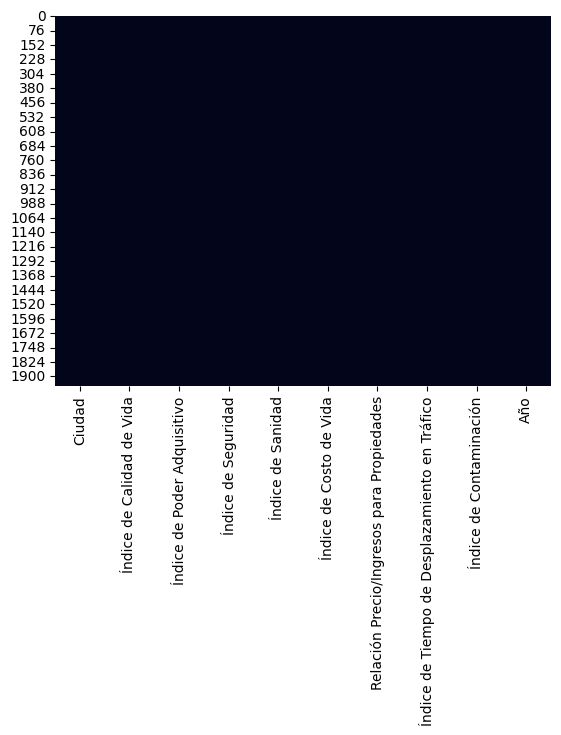

In [19]:
# Visualizacion de valores nulos

import seaborn as sns
sns.heatmap(df_quality.isnull(), cbar=False)

In [9]:
# Eliminamos la columna 'Puesto' ya que contiene un 100% de valores nulos

df_quality.drop('Puesto', axis=1, inplace=True)

In [10]:
# Eliminamos tambien el índice de clima, ya que aunque Python no interpreta el guión como un valor nulo, esta columna tiene mucha informacion faltante.
# Ademas, teniendo el indice de contaminacion, podemos hacernos una idea de como es el clima en cada ciudad.

df_quality.drop('Índice de Clima', axis=1, inplace=True)

In [11]:
# Revisamos de nuevo los nulos

df_quality.isnull().sum()

Ciudad                                           0
Índice de Calidad de Vida                        0
Índice de Poder Adquisitivo                      0
Índice de Seguridad                              0
Índice de Sanidad                                0
Índice de Costo de Vida                          0
Relación Precio/Ingresos para Propiedades        0
Índice de Tiempo de Desplazamiento en Tráfico    0
Índice de Contaminación                          0
Año                                              0
dtype: int64

In [12]:
# Revisamos los duplicados

df_quality.duplicated().any()

False

In [13]:
# Dividimos todas las columnas, excepto la ciudad y año, entre 100 ya que se tienen que expresar en porcentajes

df_quality.iloc[:, 1:9] = df_quality.iloc[:, 1:9].div(100)


In [14]:
df_quality.head()

,Ciudad,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Año
0,"Canberra, Australia",236.98,132.66,64.47,81.85,102.65,4.63,10.80,14.76,2014
1,"Ottawa, Canadá",218.77,131.88,76.09,68.64,86.15,4.90,40.00,22.46,2014
2,"Fráncfort del Óder, Alemania",214.97,139.18,72.48,63.10,96.57,5.07,28.75,31.29,2014
3,"Zúrich, Suiza",208.21,124.64,78.90,75.61,157.47,8.69,24.80,17.14,2014
4,"Denver, Colorado, Estados Unidos",205.94,133.98,60.40,82.59,82.10,1.81,43.33,37.93,2014


In [15]:
# Revisamos que los tipos de datos sean coherentes
df_quality.dtypes

Ciudad                                            object
Índice de Calidad de Vida                        float64
Índice de Poder Adquisitivo                      float64
Índice de Seguridad                              float64
Índice de Sanidad                                float64
Índice de Costo de Vida                          float64
Relación Precio/Ingresos para Propiedades        float64
Índice de Tiempo de Desplazamiento en Tráfico    float64
Índice de Contaminación                          float64
Año                                                int64
dtype: object

In [15]:
df_quality.shape

(1950, 10)

#### Coste de vida: df_cost

<Axes: >

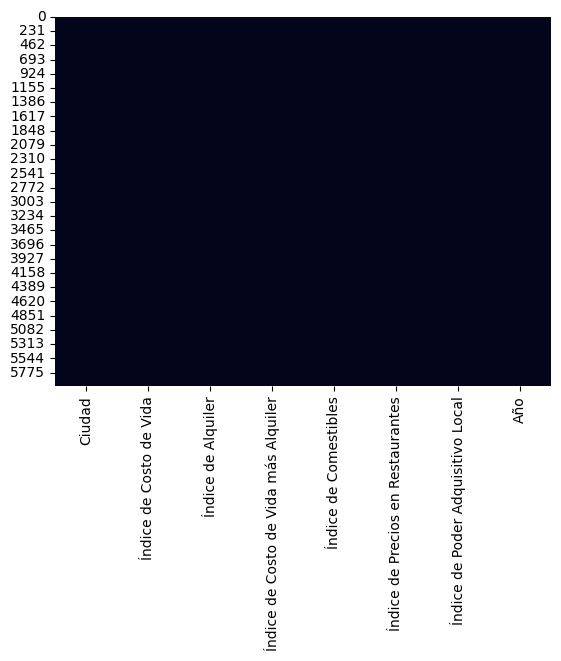

In [18]:
import seaborn as sns
sns.heatmap(df_cost.isnull(), cbar=False)

In [16]:
#Eliminamos la columna 'Puesto'. Todos sus valores son nulos
df_cost = df_cost.drop(["Puesto"], axis=1)

In [20]:
# Dividimos todas las columnas, excepto la ciudad y año, entre 100 ya que se tienen que expresar en porcentajes

columnas_a_dividir = ['Índice de Costo de Vida', 'Índice de Alquiler', 'Índice de Costo de Vida más Alquiler',
                    'Índice de Comestibles', 'Índice de Precios en Restaurantes', 'Índice de Poder Adquisitivo Local']

df_cost[columnas_a_dividir] = df_cost[columnas_a_dividir] / 100

### Selección de columnas y valores

El trabajo se va a basar en un estudio del Índice del Coste de Vida y el Índice de Salud en las capitales Europeas. Por este motivo, a continuación se van a desechar todas las ciudades que no sean capital europea.

#### Coste de vida: df_cost

In [23]:
# Nos quedamos con la ciudad

df_cost['Ciudad'] = df_cost['Ciudad'].str.split(',').str[0]

In [24]:
df_cost.set_index('Ciudad', inplace=True)

De las 27 capitales europeas, se ha podido obtener información de 26, a falta de La Valeta.

In [25]:
selected_cities = [
    'Viena', 'Bruselas', 'Sofía', 'Zagreb', 'Praga', 'Copenhague',
    'Tallin', 'Helsinki', 'París', 'Berlín', 'Atenas', 'Budapest', 'Dublín',
    'Roma', 'Riga', 'Vilna', 'Luxemburgo', 'Ámsterdam',
    'Varsovia', 'Lisboa', 'Bucarest', 'Bratislava', 'Liubliana', 'Madrid', 'Estocolmo', 'Nicosia'
]


In [26]:
df_cost = df_cost.loc[selected_cities, :]
 
df_cost

,Índice de Costo de Vida,Índice de Alquiler,Índice de Costo de Vida más Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año
Ciudad,,,,,,,
Viena,109.50,62.71,90.93,89.91,80.64,55.47,2009
Viena,103.88,56.64,82.77,88.71,84.72,93.06,2010
Viena,105.92,47.16,84.82,90.69,81.21,97.10,2011
Viena,101.47,46.87,81.82,82.49,80.97,99.19,2012
Viena,99.50,43.72,72.73,93.54,80.91,92.17,2013
...,...,...,...,...,...,...,...
Nicosia,64.65,18.01,42.25,57.12,66.36,60.65,2019
Nicosia,62.73,18.83,41.73,51.59,65.67,55.50,2020
Nicosia,68.78,20.77,45.84,58.21,69.29,57.01,2021


In [27]:
# Seleccionar solo las filas en el rango de años de 2014 a 2023
df_cost = df_cost.loc[(df_cost['Año'] >= 2014) & (df_cost['Año'] <= 2023)]

In [28]:
df_cost

,Índice de Costo de Vida,Índice de Alquiler,Índice de Costo de Vida más Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año
Ciudad,,,,,,,
Viena,90.16,36.22,63.95,90.45,79.49,94.09,2014
Viena,77.02,32.92,55.47,74.92,70.06,100.22,2015
Viena,65.87,31.86,49.53,61.57,61.04,119.81,2016
Viena,68.59,29.94,50.07,62.23,66.64,98.50,2017
Viena,78.64,35.04,57.61,73.80,73.39,98.88,2018
...,...,...,...,...,...,...,...
Nicosia,64.65,18.01,42.25,57.12,66.36,60.65,2019
Nicosia,62.73,18.83,41.73,51.59,65.67,55.50,2020
Nicosia,68.78,20.77,45.84,58.21,69.29,57.01,2021


In [29]:
df_cost.shape

(262, 7)

In [30]:
df_cost.reset_index(inplace=True)

In [31]:
# Se ha detectado que disponemos de 2 datos extra. Estos dos datos corresponden a la ciudad de Atenas, ya que hay otra ciudad en los EEUU que tiene el mismo nombre.
# Vamos a filtrar las filas de df_cost donde ciudad = atenas

df_cost[df_cost['Ciudad'] == 'Atenas']

,Ciudad,Índice de Costo de Vida,Índice de Alquiler,Índice de Costo de Vida más Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año
100,Atenas,86.75,17.74,53.22,71.09,92.08,41.80,2014
101,Atenas,70.48,13.91,42.83,59.14,75.42,45.54,2015
102,Atenas,56.00,11.24,34.49,45.72,58.11,64.66,2016
103,Atenas,61.67,24.55,43.88,57.16,67.11,133.08,2017
104,Atenas,58.60,11.89,36.22,46.86,60.73,51.30,2017
105,Atenas,64.67,13.97,40.22,51.34,64.82,52.86,2018
106,Atenas,60.55,26.67,44.21,57.85,59.58,110.52,2018
107,Atenas,58.31,12.55,36.33,45.19,59.98,50.25,2019
108,Atenas,57.21,14.86,36.95,43.71,57.69,45.51,2020
109,Atenas,60.99,16.32,39.64,48.19,58.99,41.36,2021


In [32]:
# Eliminamos las filas 103 y 106 de df_cost, ya que son las que corresponden a los EEUU 

df_cost.drop([103, 106], inplace=True)

In [33]:
# Ya tenemos 26 ciudades (a falta de La Valeta) x 10 años = 260 filas

df_cost.shape

(260, 8)

In [34]:
# Eliminamos la columna 'Índice de Costo de Vida más Alquiler' ya que con la columna 'Índice de Costo de Vida' y 'Índice de Alquiler' tenemos informacion suficiente

df_cost.drop('Índice de Costo de Vida más Alquiler', axis=1, inplace=True)

#### Calidad de vida: df_quality

In [35]:
# Nos quedamos con la ciudad

df_quality['Ciudad'] = df_quality['Ciudad'].str.split(',').str[0]

In [36]:
df_quality.set_index('Ciudad', inplace=True)

De las 27 capitales europeas, se ha podido obtener información de 26, a falta de La Valeta.

In [37]:
# Seleccionamos capitales europeas

selected_cities = [
    'Viena', 'Bruselas', 'Sofía', 'Zagreb', 'Praga', 'Copenhague',
    'Tallin', 'Helsinki', 'París', 'Berlín', 'Atenas', 'Budapest', 'Dublín',
    'Roma', 'Riga', 'Vilna', 'Luxemburgo', 'Ámsterdam',
    'Varsovia', 'Lisboa', 'Bucarest', 'Bratislava', 'Liubliana', 'Madrid', 'Estocolmo', 'Nicosia'
]

In [38]:
df_quality = df_quality.loc[selected_cities, :]
 
df_quality

,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Año
Ciudad,,,,,,,,,
Viena,169.65,94.09,70.09,77.78,90.16,12.51,25.33,25.18,2014
Viena,178.28,100.22,69.48,80.79,77.02,13.30,24.86,25.02,2015
Viena,195.97,119.81,71.96,78.80,65.87,16.72,26.28,21.17,2016
Viena,195.78,98.50,78.19,81.05,68.59,13.68,25.55,18.97,2017
Viena,188.60,98.88,77.38,77.96,78.64,14.08,26.03,18.97,2018
...,...,...,...,...,...,...,...,...,...
Nicosia,142.27,60.65,70.67,49.65,64.65,7.98,21.94,60.66,2019
Nicosia,140.77,55.50,70.11,52.24,62.73,6.97,26.15,59.59,2020
Nicosia,137.88,57.01,67.49,52.37,68.78,5.24,26.15,64.62,2021


## Análisis Exploratorio de los Datos (EDA)

### Objetivo del trabajo

El trabajo tiene como objetivo el análisis de la calidad y coste de vida en las capitales europeas y la influencia que tienen estas variables en la esperanza de vida. En total se han analizado 26 capitales, a falta de La Valeta.  
 
Todos los datos han sido extraídos de Numbeo, y atienden a opiniones de la población. A partir de esta información recopilada se han calculado los correspondientes índices, que serán objeto de estudio en el presente trabajo, y para su cálculo se ha tenido como punto referencia a New York. Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

In [39]:
import folium
from folium.plugins import FastMarkerCluster

#Mapa florencia
lats2018 = df_lon_lat['Latitude'].tolist()
lons2018 = df_lon_lat['Longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[48.922578, 8.126464], zoom_start=4)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Unión de datasets

In [40]:
# Uneme al df_cost el df_quality en 'Ciudad' y 'year' a la izquierda

df = pd.merge(df_cost, df_quality, on=['Ciudad', 'Año'], how = "left")

In [41]:
df

,Ciudad,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida_y,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación
0,Viena,90.16,36.22,90.45,79.49,94.09,2014,169.65,94.09,70.09,77.78,90.16,12.51,25.33,25.18
1,Viena,77.02,32.92,74.92,70.06,100.22,2015,178.28,100.22,69.48,80.79,77.02,13.30,24.86,25.02
2,Viena,65.87,31.86,61.57,61.04,119.81,2016,195.97,119.81,71.96,78.80,65.87,16.72,26.28,21.17
3,Viena,68.59,29.94,62.23,66.64,98.50,2017,195.78,98.50,78.19,81.05,68.59,13.68,25.55,18.97
4,Viena,78.64,35.04,73.80,73.39,98.88,2018,188.60,98.88,77.38,77.96,78.64,14.08,26.03,18.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Nicosia,64.65,18.01,57.12,66.36,60.65,2019,142.27,60.65,70.67,49.65,64.65,7.98,21.94,60.66
256,Nicosia,62.73,18.83,51.59,65.67,55.50,2020,140.77,55.50,70.11,52.24,62.73,6.97,26.15,59.59
257,Nicosia,68.78,20.77,58.21,69.29,57.01,2021,137.88,57.01,67.49,52.37,68.78,5.24,26.15,64.62
258,Nicosia,64.53,19.34,52.57,65.96,60.28,2022,137.87,60.28,67.34,50.72,64.53,6.01,25.25,65.67


A continuación, uniremos el df_quality con un conjunto de datos relativo a la esperanza de vida de cada ciudad. Este conjunto de datos se ha extraido manualmente de la página https://ec.europa.eu/eurostat/databrowser/view/demo_mlexpec__custom_8613870/default/table?lang=en para los años 2014-2022. La información contenida en esa página web es una estimación del United Nations Population Division.  
Por otro lado, los datos del 2023 se han obtenido de la siguiente página: https://www.macrotrends.net/countries/SWE/sweden/life-expectancy.

In [46]:
# Al df le unimos el excel con la esperanza de vida de cada ciudad

df_life_exp = pd.read_excel('/Users/erikadielingen/Ciudades_Europa/inputs/life_expectancy_2014_2023.xlsx')

df = pd.merge(df, df_life_exp, on=['Ciudad', 'Año'], how = "left")

df



,Ciudad,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Año,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida_y,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Esperanza vida
0,Viena,90.16,36.22,90.45,79.49,94.09,2014,169.65,94.09,70.09,77.78,90.16,12.51,25.33,25.18,81.60
1,Viena,77.02,32.92,74.92,70.06,100.22,2015,178.28,100.22,69.48,80.79,77.02,13.30,24.86,25.02,81.30
2,Viena,65.87,31.86,61.57,61.04,119.81,2016,195.97,119.81,71.96,78.80,65.87,16.72,26.28,21.17,81.80
3,Viena,68.59,29.94,62.23,66.64,98.50,2017,195.78,98.50,78.19,81.05,68.59,13.68,25.55,18.97,81.70
4,Viena,78.64,35.04,73.80,73.39,98.88,2018,188.60,98.88,77.38,77.96,78.64,14.08,26.03,18.97,81.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Nicosia,64.65,18.01,57.12,66.36,60.65,2019,142.27,60.65,70.67,49.65,64.65,7.98,21.94,60.66,82.30
256,Nicosia,62.73,18.83,51.59,65.67,55.50,2020,140.77,55.50,70.11,52.24,62.73,6.97,26.15,59.59,82.40
257,Nicosia,68.78,20.77,58.21,69.29,57.01,2021,137.88,57.01,67.49,52.37,68.78,5.24,26.15,64.62,81.30
258,Nicosia,64.53,19.34,52.57,65.96,60.28,2022,137.87,60.28,67.34,50.72,64.53,6.01,25.25,65.67,81.70


In [49]:
# Al hacer la unión, nos aparece una cantidad de valores nulos ya que el df_quality no contiene toda la información de las ciudades que hay en el df_cost
# Igualmente no se eliminarán ya que no son muchos y no nos afecta a la hora de hacer los cálculos. Simplemente los omitiremos a la hora de hacer las visualizaciones.
(df.isnull().sum() / df.shape[0]) * 100

Ciudad                                           0.0
Índice de Costo de Vida_x                        0.0
Índice de Alquiler                               0.0
Índice de Comestibles                            0.0
Índice de Precios en Restaurantes                0.0
Índice de Poder Adquisitivo Local                0.0
Año                                              0.0
Índice de Calidad de Vida                        5.0
Índice de Poder Adquisitivo                      5.0
Índice de Seguridad                              5.0
Índice de Sanidad                                5.0
Índice de Costo de Vida_y                        5.0
Relación Precio/Ingresos para Propiedades        5.0
Índice de Tiempo de Desplazamiento en Tráfico    5.0
Índice de Contaminación                          5.0
Esperanza vida                                   0.0
dtype: float64

In [50]:
columns = df.columns.tolist()

# Reestructurmaos el df moviendo la columna 'Año' a la segunda posición
nueva_posicion = 1  # índice de la nueva posición (empezando desde 0)
columns.insert(nueva_posicion, columns.pop(columns.index('Año')))

df = df[columns]

df

,Ciudad,Año,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Poder Adquisitivo Local,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Índice de Costo de Vida_y,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Esperanza vida
0,Viena,2014,90.16,36.22,90.45,79.49,94.09,169.65,94.09,70.09,77.78,90.16,12.51,25.33,25.18,81.60
1,Viena,2015,77.02,32.92,74.92,70.06,100.22,178.28,100.22,69.48,80.79,77.02,13.30,24.86,25.02,81.30
2,Viena,2016,65.87,31.86,61.57,61.04,119.81,195.97,119.81,71.96,78.80,65.87,16.72,26.28,21.17,81.80
3,Viena,2017,68.59,29.94,62.23,66.64,98.50,195.78,98.50,78.19,81.05,68.59,13.68,25.55,18.97,81.70
4,Viena,2018,78.64,35.04,73.80,73.39,98.88,188.60,98.88,77.38,77.96,78.64,14.08,26.03,18.97,81.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Nicosia,2019,64.65,18.01,57.12,66.36,60.65,142.27,60.65,70.67,49.65,64.65,7.98,21.94,60.66,82.30
256,Nicosia,2020,62.73,18.83,51.59,65.67,55.50,140.77,55.50,70.11,52.24,62.73,6.97,26.15,59.59,82.40
257,Nicosia,2021,68.78,20.77,58.21,69.29,57.01,137.88,57.01,67.49,52.37,68.78,5.24,26.15,64.62,81.30
258,Nicosia,2022,64.53,19.34,52.57,65.96,60.28,137.87,60.28,67.34,50.72,64.53,6.01,25.25,65.67,81.70


In [51]:
# Eliminamos las columnas duplicadas que aparecen

df = df.drop(["Índice de Poder Adquisitivo Local"], axis=1)
df = df.drop(['Índice de Costo de Vida_y'], axis=1)

### Revision de outliers

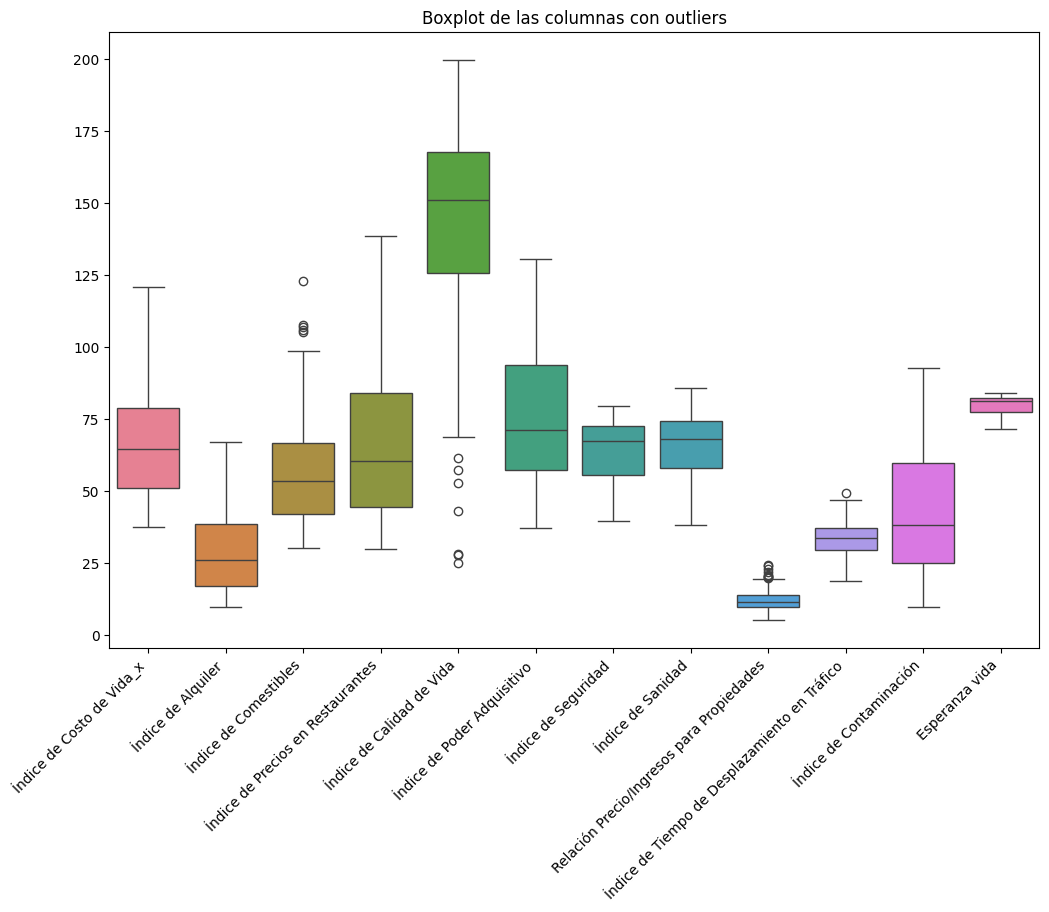

In [52]:
# Representacion gráfica

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Creamos un boxplot para cada columna

sns.boxplot(data=df.iloc[:, 2:])

plt.title('Boxplot de las columnas con outliers')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [53]:
# Función para detectar outliers

def outliers1 (df):
     for columnas in df:
         Q1 = df[columnas].quantile(0.25)
         Q3 = df[columnas].quantile(0.75)
         IQR = Q3 - Q1
         outlierIzq = Q1-(1.5*IQR)
         outlierDer = Q3+(1.5*IQR)
         outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
         print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers")
    
outliers1(df.iloc[:, 2:])


La variable Índice de Costo de Vida_x tiene 0 valores outliers
La variable Índice de Alquiler tiene 0 valores outliers
La variable Índice de Comestibles tiene 5 valores outliers
La variable Índice de Precios en Restaurantes tiene 0 valores outliers
La variable Índice de Calidad de Vida tiene 7 valores outliers
La variable Índice de Poder Adquisitivo tiene 0 valores outliers
La variable Índice de Seguridad tiene 0 valores outliers
La variable Índice de Sanidad tiene 0 valores outliers
La variable Relación Precio/Ingresos para Propiedades tiene 9 valores outliers
La variable Índice de Tiempo de Desplazamiento en Tráfico tiene 1 valores outliers
La variable Índice de Contaminación tiene 0 valores outliers
La variable Esperanza vida tiene 0 valores outliers


In [54]:
""" Se puede dar el caso de que en varias ciudades el índice de Precio/Ingresos sea bastante mayor que en otras ciudades,
y no por ello habría que modificarlo, sino que estudiar el por qué de esa diferencia."""
# Vamos a ver los límites de los outliers

columnas = df.columns.tolist()

Q1 = df[columnas].quantile(0.25)
Q3 = df[columnas].quantile(0.75)
IQR = Q3 - Q1
outlierIzq = Q1-(1.5*IQR)
outlierDer = Q3+(1.5*IQR)

In [55]:
#Visualizamos el límite inferior
outlierIzq

Año                                              2008.50000
Índice de Costo de Vida_x                           9.41625
Índice de Alquiler                                -15.18750
Índice de Comestibles                               4.67125
Índice de Precios en Restaurantes                 -15.06500
Índice de Calidad de Vida                          62.34750
Índice de Poder Adquisitivo                         2.92250
Índice de Seguridad                                30.11750
Índice de Sanidad                                  33.43000
Relación Precio/Ingresos para Propiedades           3.96750
Índice de Tiempo de Desplazamiento en Tráfico      18.23500
Índice de Contaminación                           -26.56750
Esperanza vida                                     70.38750
dtype: float64

In [56]:
#Visualizamos el límite superior
outlierDer

Año                                              2028.50000
Índice de Costo de Vida_x                         120.68625
Índice de Alquiler                                 70.99250
Índice de Comestibles                             103.88125
Índice de Precios en Restaurantes                 143.33500
Índice de Calidad de Vida                         230.76750
Índice de Poder Adquisitivo                       148.02250
Índice de Seguridad                                97.81750
Índice de Sanidad                                  98.55000
Relación Precio/Ingresos para Propiedades          19.70750
Índice de Tiempo de Desplazamiento en Tráfico      48.47500
Índice de Contaminación                           111.21250
Esperanza vida                                     89.28750
dtype: float64

#### Sobre los outliers en 'Índice de Calidad de Vida'

Una consideración importante a tener en cuenta es que los datos son recopilados a partir de los usuarios que han podido aportar información sobre las condiciones de la ciudad durante ese año en concreto y puede ser o no ser el caso de que sean representativos por los errores que ocurran en la recopilación de estos datos, que no son oficiales; y el índice de la calidad de vida se calcula en base a estos datos aportados. Sin emabrgo, vamos a intentar asumir el caso en el que los outliers no vienen de un error en los datos, sino que son una representación válida de la situación de la ciudad, y vamos a intentar entender y explicar estos outliers de Atenas, Roma y Bucarest con información general de las ciudades durante 2014-2015 y viendo qué variables afectaron sobre todo a este índice en un mapa de correlación. 

In [57]:
df[df['Índice de Calidad de Vida'] < 62.3475]

,Ciudad,Año,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Esperanza vida
20,Sofía,2014,51.59,12.41,47.10,38.22,61.51,41.96,54.24,59.91,9.57,37.91,67.68,74.5
100,Atenas,2014,86.75,17.74,71.09,92.08,43.14,41.80,47.65,48.94,12.94,41.64,59.82,81.5
101,Atenas,2015,70.48,13.91,59.14,75.42,57.36,45.54,49.46,49.08,11.31,39.91,58.14,81.1
130,Roma,2014,95.51,55.52,85.02,105.10,25.05,58.99,40.63,62.46,24.11,44.62,71.01,83.2
131,Roma,2015,83.75,48.40,73.50,98.84,27.65,58.09,44.02,57.34,24.20,45.10,69.44,82.7
200,Bucarest,2014,52.12,15.66,45.60,43.01,28.24,37.19,68.11,50.27,14.01,38.12,92.66,75.0
201,Bucarest,2015,44.79,12.73,39.11,38.91,52.92,39.04,68.73,51.43,12.82,35.45,76.06,74.9


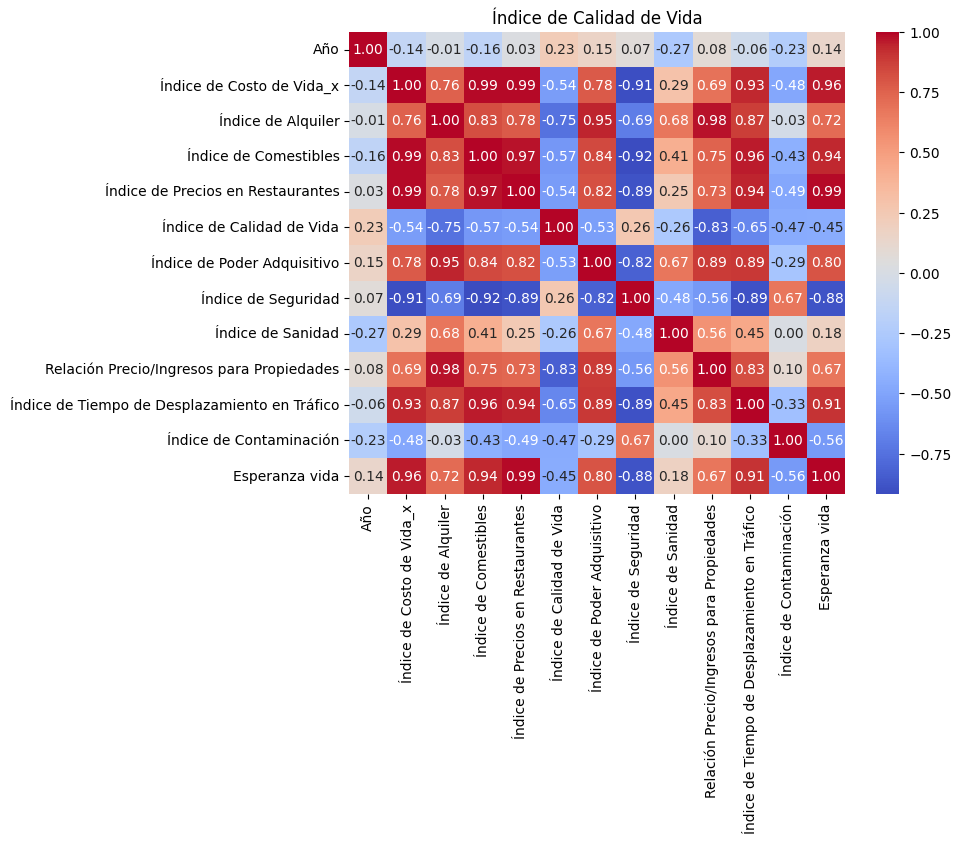

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered1 = df[df['Índice de Calidad de Vida'] < 62.3475]
corr1= filtered1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Índice de Calidad de Vida')
plt.show();

In [59]:
corr1['Índice de Calidad de Vida'].sort_values(ascending=False)

Índice de Calidad de Vida                        1.000000
Índice de Seguridad                              0.257185
Año                                              0.225621
Índice de Sanidad                               -0.260572
Esperanza vida                                  -0.453827
Índice de Contaminación                         -0.465201
Índice de Poder Adquisitivo                     -0.534987
Índice de Costo de Vida_x                       -0.535367
Índice de Precios en Restaurantes               -0.543657
Índice de Comestibles                           -0.572502
Índice de Tiempo de Desplazamiento en Tráfico   -0.651991
Índice de Alquiler                              -0.752169
Relación Precio/Ingresos para Propiedades       -0.830867
Name: Índice de Calidad de Vida, dtype: float64

Como podemos observar, encontramos cifras significativas en la correlación del Índice de calidad de vida en múltiples variables. Entre estas es destacable mencionar aquellas relacionadas con los precios elevados, especialmente 'Relación Precio/Ingresos para Propiedades' con -0.830867 y 'Índice de Alquiler' con -0.752169, que pueden indicarnos que los precios de las propiedades y alquileres eran demasiado altos en comparación a las ganacias de la población. 

Encontramos por ejemplo que la crisis ecoómica de Grecia entre 2014 y 2015 pudo afectar bastante la situación económica y en consecuanecia la percepción sobre la calidad de vida. En Roma durante mediados del 2014 y hasta 2015, el mercado también sufrió, y el GDP tuvo una contracción importante. En estos casos, es de esperar que la opinión sobre la calidad de vida en la capital sea afectada. Y en Bucarest, Romania, no se observa nada negativo que destacar económicamente durante el período de 2014 a 2015 (de hecho, se observó un cambio positivo en varios sectores). Sin embargo, hay muchos más factores que estamos dejando muy de lado y sobre los que se requiere un estudio a fondo para saber a qué se debe la aparición de estos outliers, de nuevo es también importante tener en cuenta la calidad de los datos con los que estamos trabajando. 

#### Sobre los outliers en 'Relación Precio/Ingresos para Propiedades'

Es importante tener la misma consideración de antes sobre la naturaleza de los datos. Pero veamos qué podemos encontrar con lo que disponemos, y si es posible relacionar estos outliers con algún evento específico que tal vez pueda contribuir de alguna manera a explicarlo.

In [60]:
df[df['Relación Precio/Ingresos para Propiedades'] > 19.7075]

,Ciudad,Año,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Esperanza vida
86,París,2020,85.16,46.98,78.98,81.35,116.89,71.17,48.24,77.14,22.02,42.58,66.29,82.30
87,París,2021,94.23,51.78,91.62,87.63,118.60,69.34,46.81,79.49,20.97,40.76,64.54,82.40
89,París,2023,76.06,43.71,74.23,69.81,122.65,77.86,43.08,79.11,20.19,41.50,63.89,83.13
130,Roma,2014,95.51,55.52,85.02,105.10,25.05,58.99,40.63,62.46,24.11,44.62,71.01,83.20
131,Roma,2015,83.75,48.40,73.50,98.84,27.65,58.09,44.02,57.34,24.20,45.10,69.44,82.70
132,Roma,2016,70.02,38.93,60.87,75.03,119.69,89.49,44.13,55.25,20.21,46.43,72.77,83.40
133,Roma,2017,74.06,37.18,64.50,74.29,113.99,72.41,44.53,58.35,23.04,46.70,66.63,83.10
134,Roma,2018,78.80,40.24,68.34,85.32,109.84,72.78,45.66,59.50,20.48,46.88,67.50,83.40
135,Roma,2019,69.84,36.16,58.62,78.12,110.01,64.52,46.99,59.63,19.80,46.29,66.67,83.60


Es muy importante destacar que Lisboa durante este año 2023 ha tenido un aumento en precios de las propiedades y rentas. Esto contribuye a nuestra decisión de conservar el outlier. 
En cuanto a Paris y Roma, ambas ciudades tienen los costes de vida más elevados de Europa. También han reportado precios en aumento de las propiedades a lo largo de los años, originándose a partir de un mercado saturado; además de ser ciudades muy turísticas e importantes culturalmente, tienen restricciones de construcciones de viviendas para preservar la riqueza histórica.   

In [61]:
#Correlación de 'Relación Precio/Ingresos para Propiedades' sin tener en cuenta los outliers
filtered3 = df[df['Relación Precio/Ingresos para Propiedades'] <= 19.7075]
corr3= filtered3.corr()
corr3['Relación Precio/Ingresos para Propiedades'].sort_values(ascending=False)

Relación Precio/Ingresos para Propiedades        1.000000
Índice de Tiempo de Desplazamiento en Tráfico    0.211052
Año                                              0.159100
Índice de Sanidad                                0.138673
Índice de Seguridad                              0.134940
Esperanza vida                                   0.012564
Índice de Alquiler                              -0.026306
Índice de Calidad de Vida                       -0.081399
Índice de Contaminación                         -0.082451
Índice de Comestibles                           -0.124981
Índice de Costo de Vida_x                       -0.197380
Índice de Poder Adquisitivo                     -0.215138
Índice de Precios en Restaurantes               -0.269723
Name: Relación Precio/Ingresos para Propiedades, dtype: float64

## ANÁLISIS

### Calidad de vida

A continuación, se va a proceder a realizar un estudio de la calidad de vida en las 26 capitales europeas de las que se ha obtenido información.  
Para ello, se han tenido en cuenta las siguientes variables:  
 
- Índice de Poder Adquisitivo: evalúa la capacidad de compra de la moneda local en términos de bienes y servicios.  
- Índice de Seguridad: indica el nivel de seguridad percibido en una ciudad.  
- Índice de Sanidad: mide la calidad del sistema de atención médica en una ciudad.  
- Relación Precio/Ingresos para Propiedades: representa la relación entre el precio de la propiedad y los ingresos medios en una ciudad.  
- Índice de Tiempo de Desplazamiento en Tráfico: mide la congestión del tráfico y el tiempo de desplazamiento en una ciudad.  
- Índice de Contaminación: indica el nivel de contaminación en una ciudad.

#### Representación gráfica de la distribución de los datos

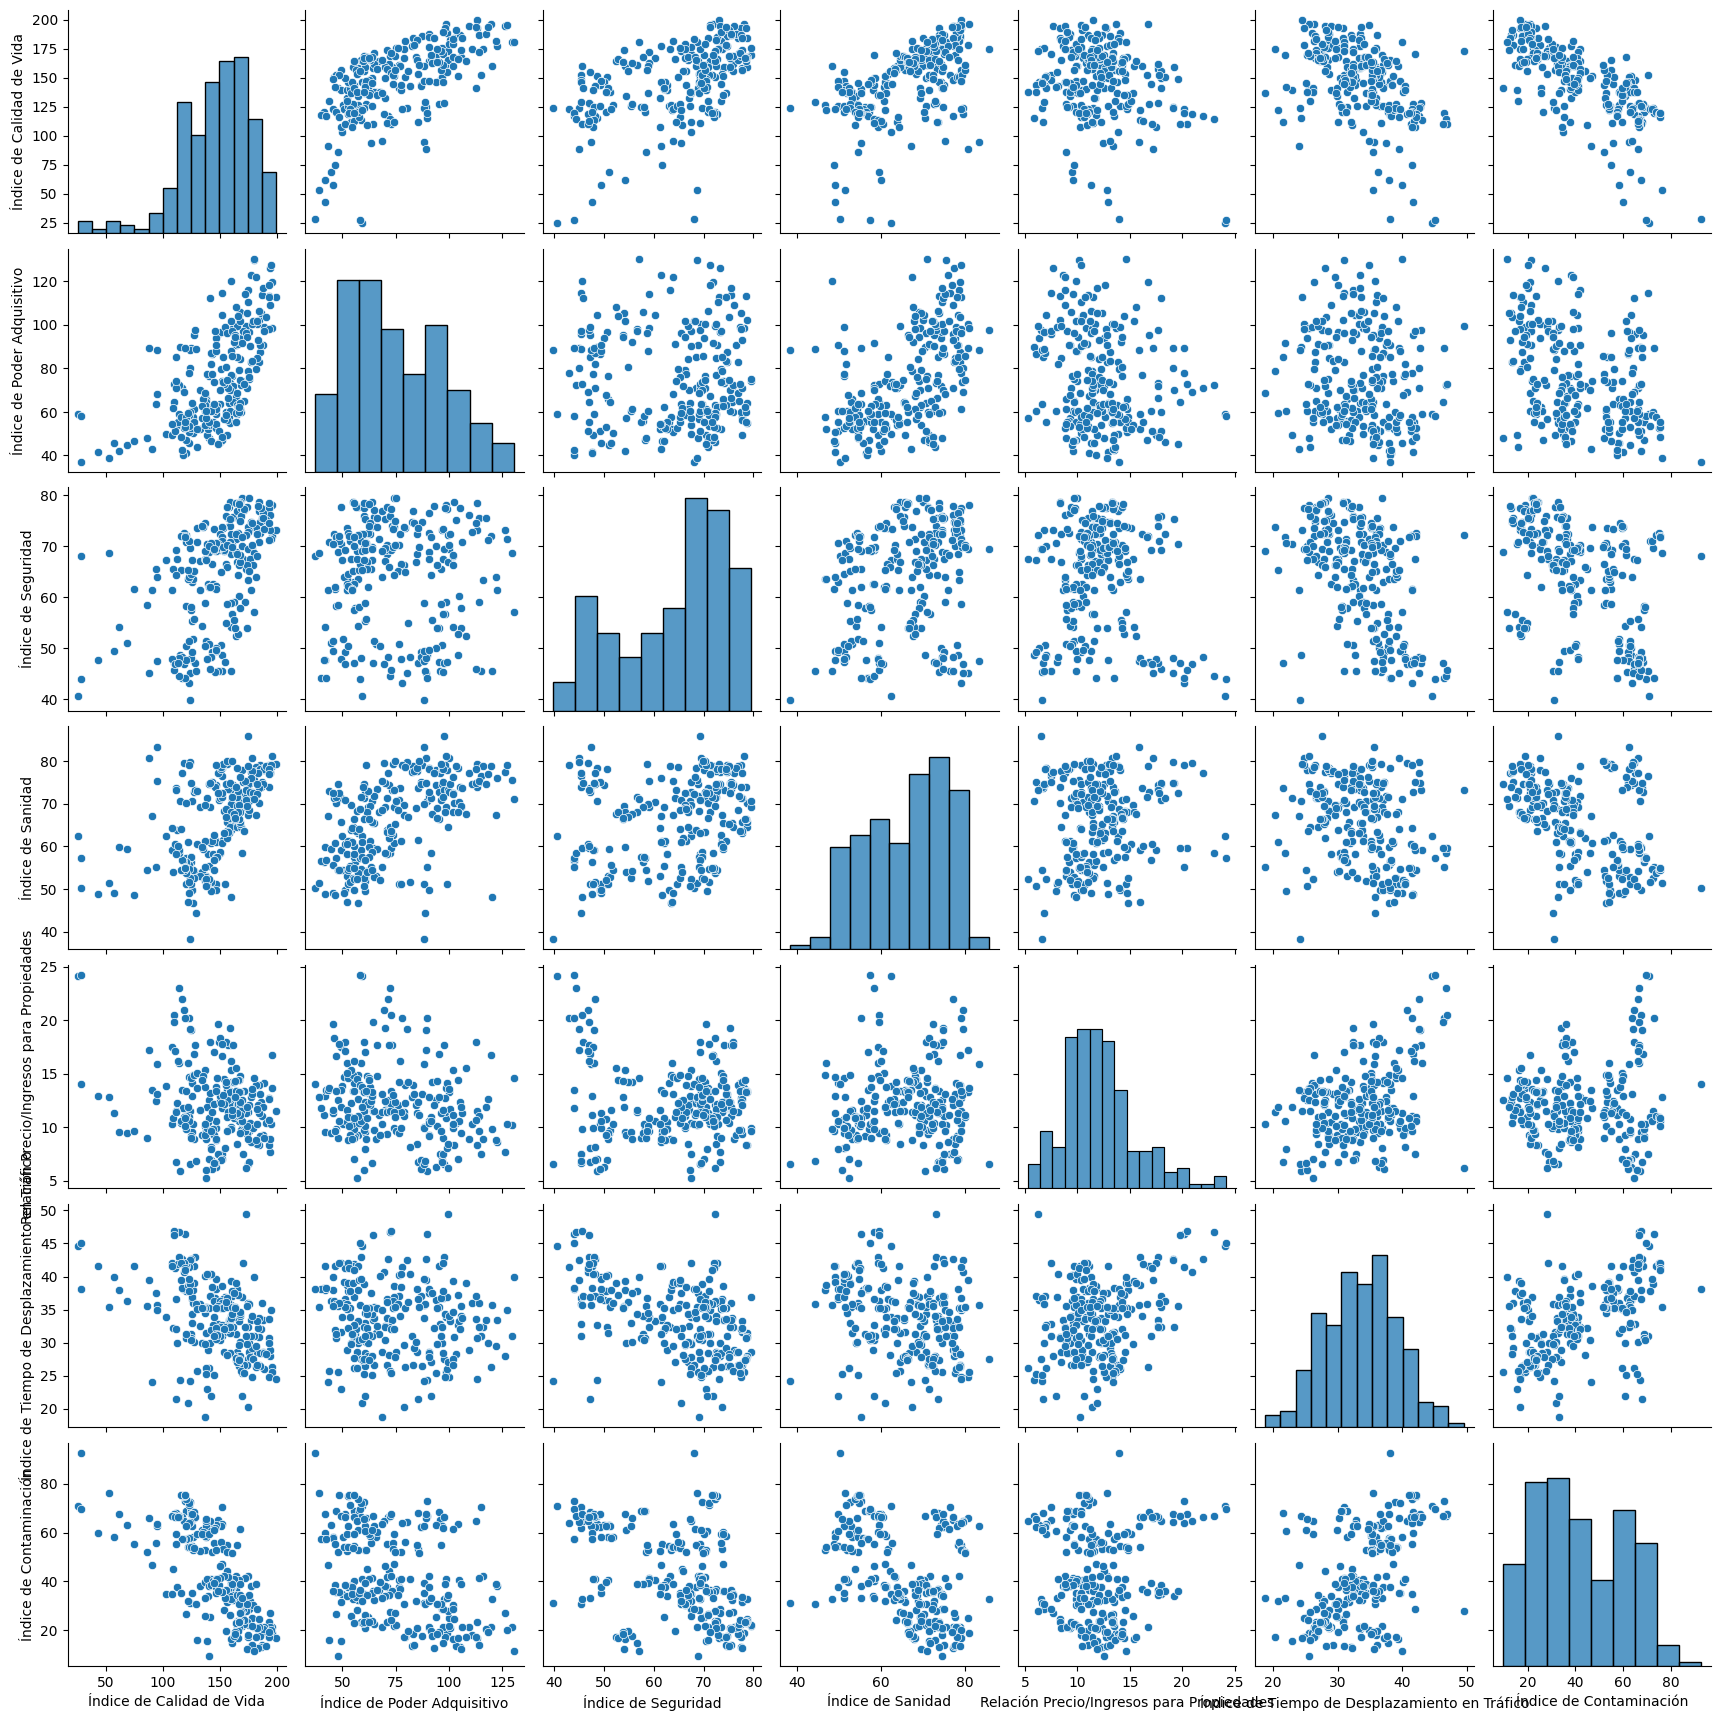

In [64]:
# Representemos cómo están distribuídos los datos en las variables


df_calidad = df[df['Año']==2023]

df_calidad = df.iloc[:, 6:13]

sns.pairplot(df_calidad)
plt.show()

A través del gráfico anterior podemos hacernos una idea general de cómo afectan las otras variables a la calidad de vida. A priori, se observa que la calidad de vida viene afectada positivamente por el Poder Adquisitivo, el Índice de Seguridad y el Índice de Sanidad, ya que en las gráficas superiores se observa una tendencia positiva. Por el contrario, la Relación Precio/Ingresos para Propiedades, el Tiempo de Desplazamiento en Tráfico y el Índice de Contaminación, afectan negativamente a la calidad de vida.

#### Top 5 ciudades con mejor calidad de vida en 2023

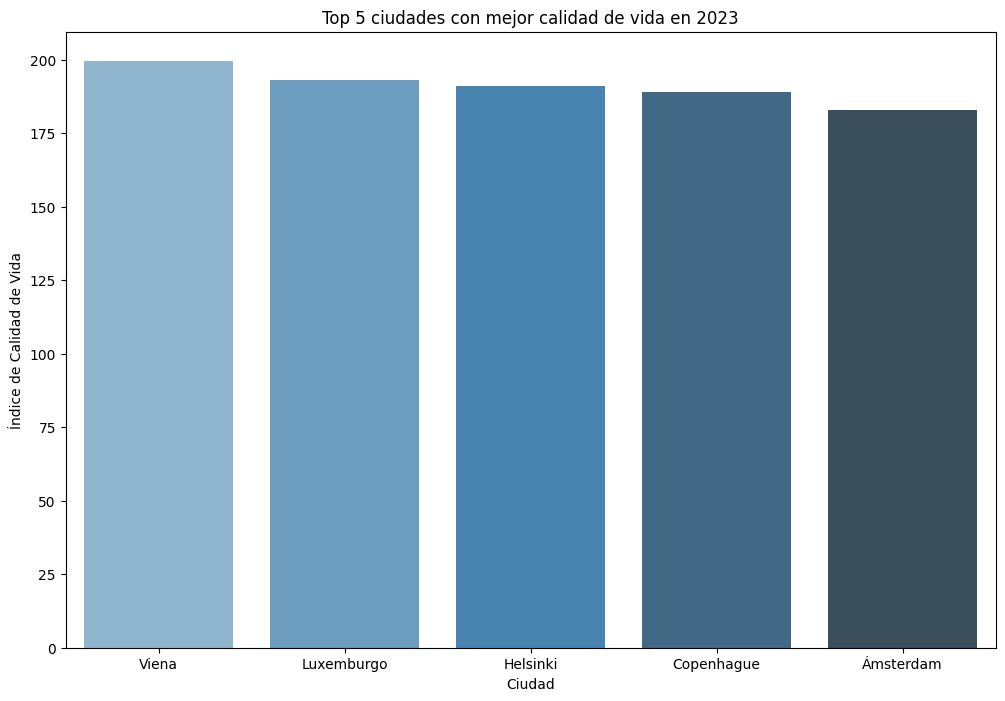

In [65]:
df_top_quality = df[df['Año'] == 2023] # Nos quedamos con el año 2023

df_top_quality = df_top_quality.sort_values(by=['Índice de Calidad de Vida'], ascending=False) # Ordenamos de mayor a menor

df_top_quality = df_top_quality[['Ciudad', 'Índice de Calidad de Vida']] # Nos quedamos con las columnas que nos interesan

# Gráfico de barras

plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Índice de Calidad de Vida', data=df_top_quality.head(), palette='Blues_d')

plt.title('Top 5 ciudades con mejor calidad de vida en 2023')

plt.show();

Se observa que la ciudad de Viena encabeza la lista del top 5 con mejor calidad de vida, seguida de Luxemburgo. Aún así, no hay una diferencia significativa entre las 5 ciudades.

#### ¿Qué es lo que más afecta a la calidad de vida?

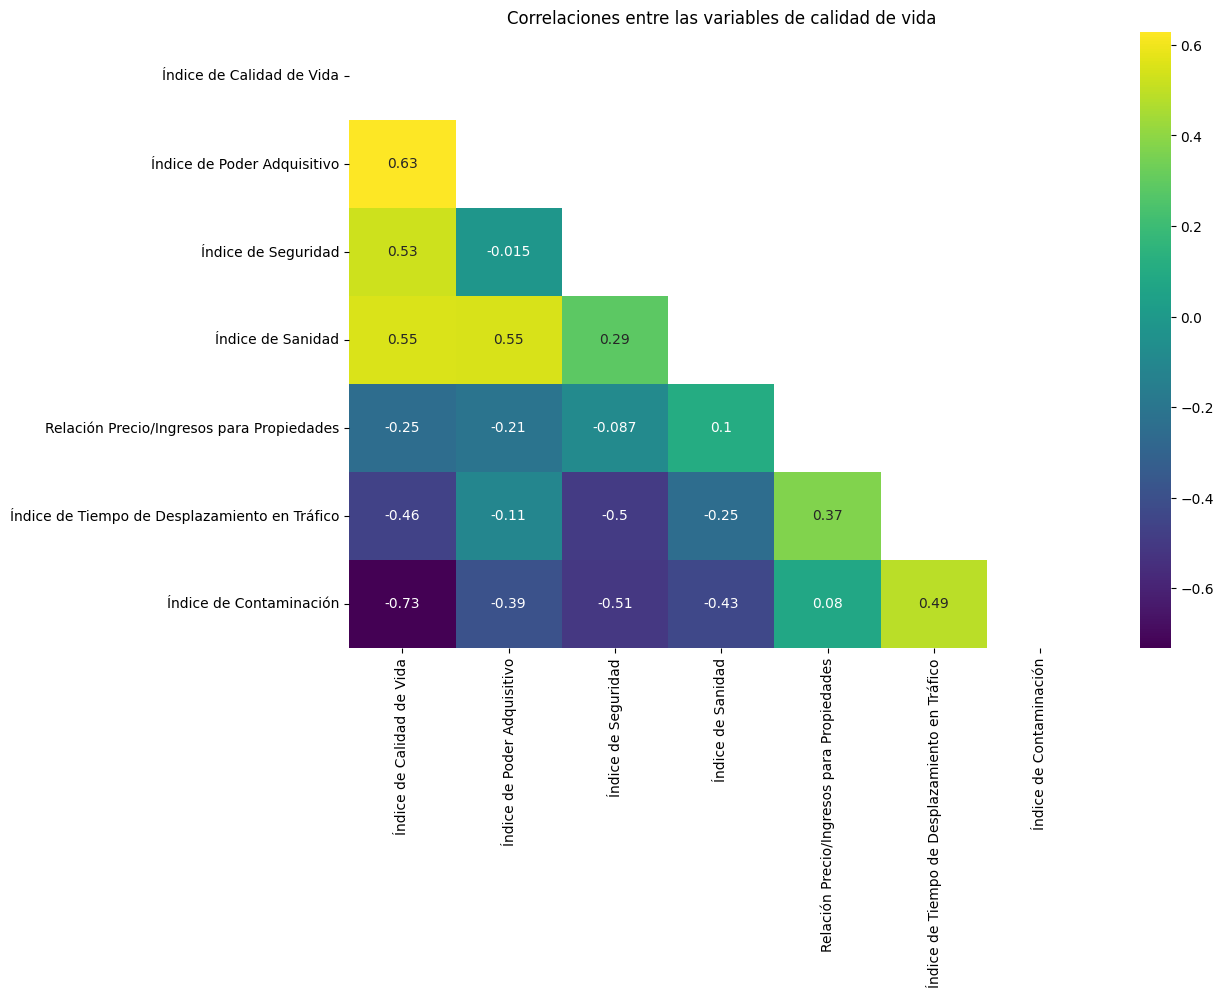

In [66]:
import numpy as np

# Mapa de calor con las correlaciones

plt.figure(figsize=(12, 8))

sns.heatmap(df_calidad.corr(), annot=True, cmap='viridis',  mask=np.triu(df_calidad.corr()))

plt.title('Correlaciones entre las variables de calidad de vida')

plt.show();

In [67]:
# Sacamos las variables que mantienen una correlación con respecto al índice de la calidad de vida superior al 0.5

# primero creamos una matriz de correlacion: df_calidad.corr()
# dentro de la matriz, accedemos a la columna 'Índice de Calidad de Vida': df_calidad.corr()['Índice de Calidad de Vida']
# dentro de la columna, filtramos los valores superiores a 0.5: df_calidad.corr()['Índice de Calidad de Vida'][df_calidad.corr()['Índice de Calidad de Vida'] > 0.5]


df_calidad.corr()['Índice de Calidad de Vida'][df_calidad.corr()['Índice de Calidad de Vida'] > 0.5]



Índice de Calidad de Vida      1.000000
Índice de Poder Adquisitivo    0.629095
Índice de Seguridad            0.525355
Índice de Sanidad              0.553106
Name: Índice de Calidad de Vida, dtype: float64

In [68]:
# Sacamos las variables que mantienen una correlación con respecto al índice de la calidad de vida inferior al - 0.5

df_calidad.corr()['Índice de Calidad de Vida'][df_calidad.corr()['Índice de Calidad de Vida'] < - 0.5]

Índice de Contaminación   -0.731745
Name: Índice de Calidad de Vida, dtype: float64

La variable que más relacion mantiene, aunque indirecta, con la calidad de vida es la contaminación, seguida del poder adquisitivo.
En el caso del poder adquisitivo, la relación es positiva, mientras que con la contaminación la relación es negativa o inversa.  
La seguridad y la sanidad son también variables que afectan a la calidad de vida, ambas de manera positiva. 

De hecho, a través del siguiente gráfico elaborado a través de K-means, se pueden ver 3 grupos claramente diferenciados según la contaminación frente a la calidad de vida.

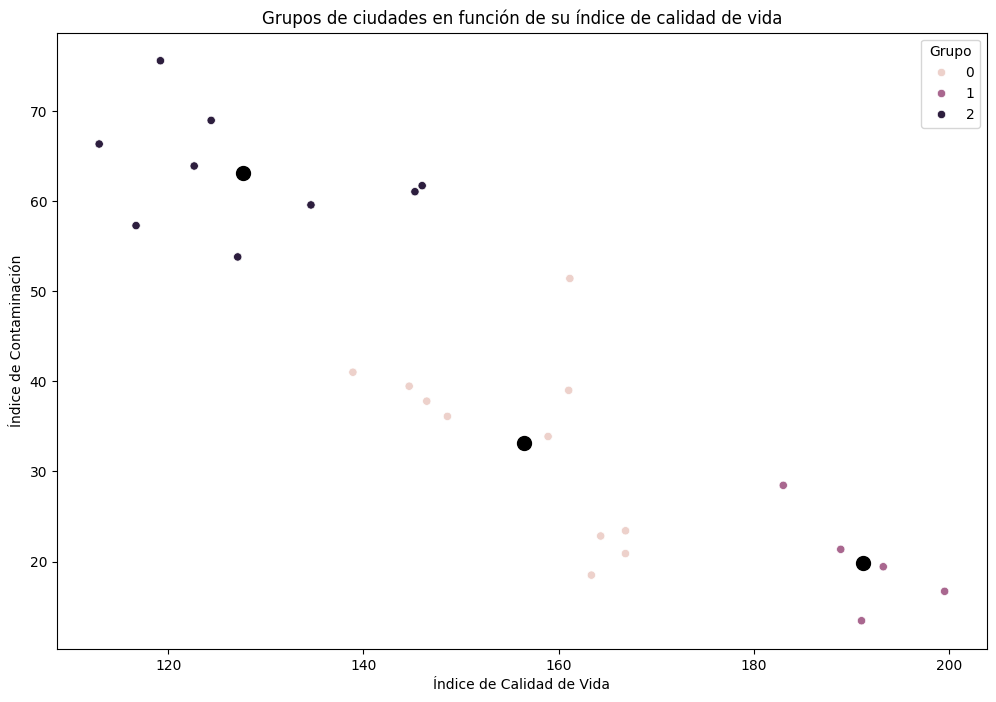

In [70]:
df_clusters = df.copy()

df_clusters = df_clusters[df_clusters['Año'] == 2023]

# Agrupación en clústeres K-means de las ciudades en función de su índice de calidad de vida
import sklearn
from sklearn.cluster import KMeans

# Nos quedamos con las columnas que nos interesan

df_clustering = df_clusters[['Índice de Calidad de Vida', 'Índice de Contaminación']]

# Creamos el modelo

kmeans = KMeans(n_clusters=3, random_state=0)

# Entrenamos el modelo

kmeans.fit(df_clustering)

# Predecimos los clusters

clusters = kmeans.predict(df_clustering)

# Añadimos los clusters al df

df_clusters['Grupo'] = clusters

df_clusters.head()

# Representación gráfica

plt.figure(figsize=(12, 8))

sns.scatterplot(x='Índice de Calidad de Vida', y='Índice de Contaminación', hue='Grupo', data=df_clusters)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroides')

plt.title('Grupos de ciudades en función de su índice de calidad de vida')

plt.show();

En el gráfico anterior se observan 3 grupos:
- Ciudades con una alta contaminación y un índice de calidad de vida bajo.
- Ciudades con una contaminación de nivel medio y una calidad de vida de nivel medio.
- Ciudades con una baja contaminación y una alta calidad de vida.

Veamos entonces cual es el top 5 de ciudades con menor contaminación en 2023.

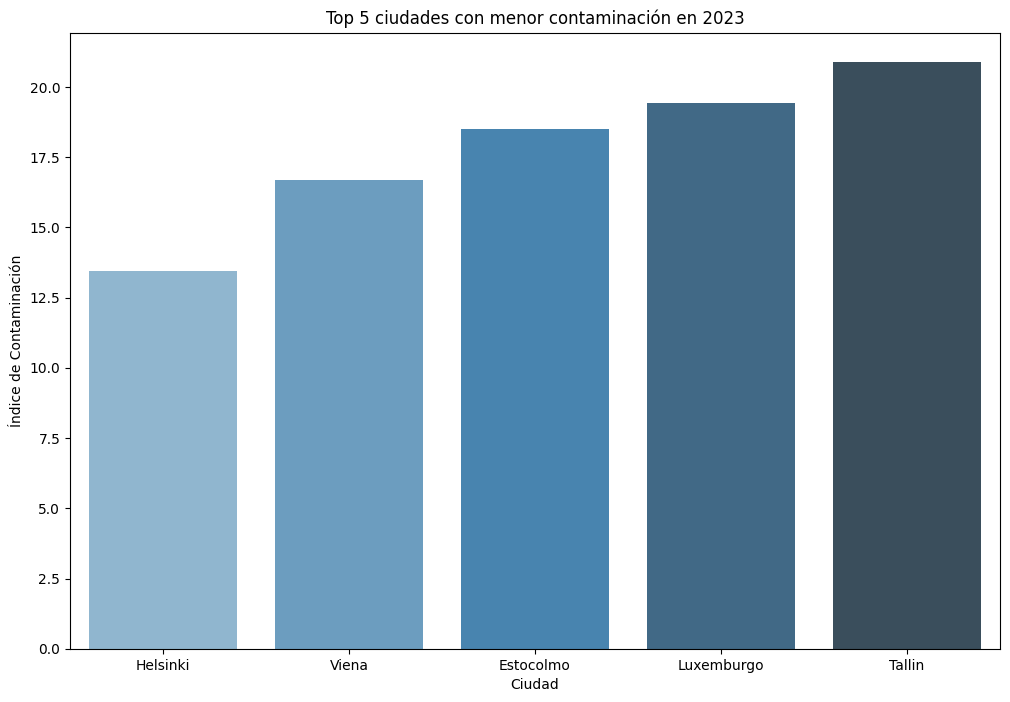

In [68]:
df_top_contaminacion = df[df['Año'] == 2023] # Nos quedamos con el año 2023

df_top_contaminacion = df_top_contaminacion.sort_values(by=['Índice de Contaminación'], ascending=True) # Ordenamos de menor a mayor

df_top_contaminacion = df_top_contaminacion[['Ciudad', 'Índice de Contaminación']] # Nos quedamos con las columnas que nos interesan

# Realizamos el gráfico 

plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Índice de Contaminación', data=df_top_contaminacion.head(), palette='Blues_d')

plt.title('Top 5 ciudades con menor contaminación en 2023')

plt.show();


Se observa que 3 de las 5 ciudades con el índice de contaminación más bajo. son también ciudades con el índice de calidad de vida más alto. Es lógico que no coincidan todas ellas ya que, como hemos visto antes, hay otros factores que afectan a su vez a la calidad de vida.

### Esperanza de vida

#### Las ciudades con mayor indice de sanidad, ¿tienen más esperanza de vida?

In [92]:
# Sacamos la correlación entre el índice de sanidad y la esperanza de vida

df.corr()['Índice de Sanidad']['Esperanza vida']



0.4064142867263904

A priori, parece que la relación es positiva. Es decir, a mayor indice de sanidad, mayor esperanza de vida.  
Veamos ahora si las ciudades con mayor indice de sanidad en 2023 son las que más esperanza de vida tienen en 2023.

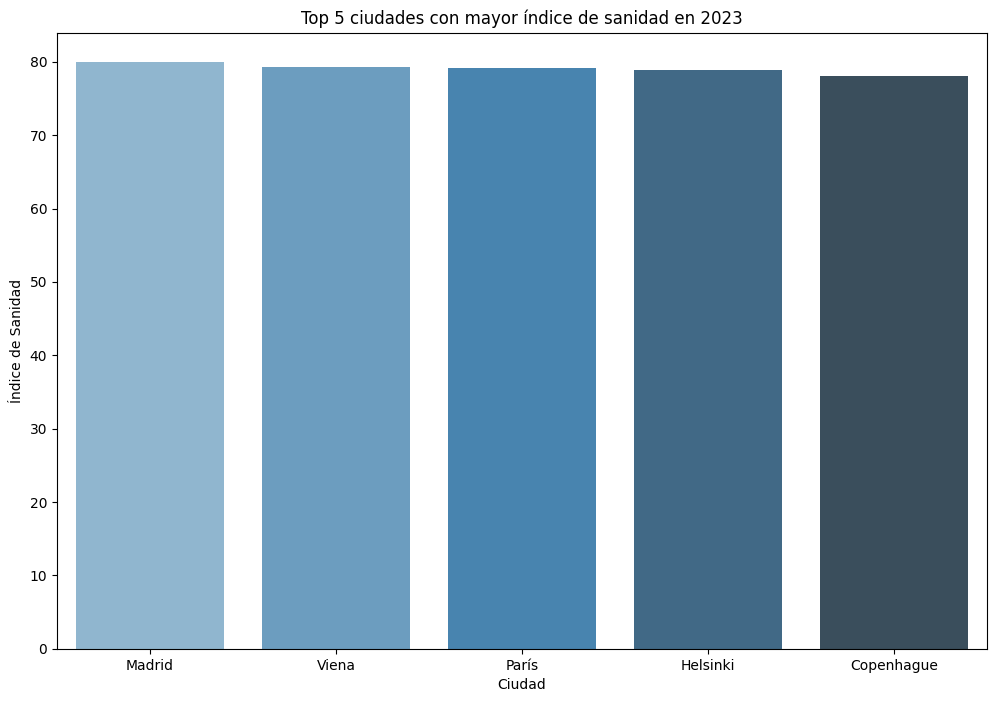

In [93]:
df_sanidad_esperanza = df[df['Año'] == 2023] # Nos quedamos con el año 2023

df_sanidad_esperanza = df_sanidad_esperanza.sort_values(by=['Índice de Sanidad'], ascending=False) # Ordenamos de mayor a menor

df_sanidad_esperanza = df_sanidad_esperanza[['Ciudad', 'Índice de Sanidad']] # Nos quedamos con las columnas que nos interesan

df_sanidad_esperanza.head() # Mostamos las 5 primeras

plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Índice de Sanidad', data=df_sanidad_esperanza.head(), palette='Blues_d')

plt.title('Top 5 ciudades con mayor índice de sanidad en 2023')

plt.show();

Madrid se posiciona como la ciudad con mejor índice de sanidad en 2023, seguida de Viena.

Ahora, vamos a ver el top 5 de ciudades con mayor esperanza de vida de cara a ver si coinciden.

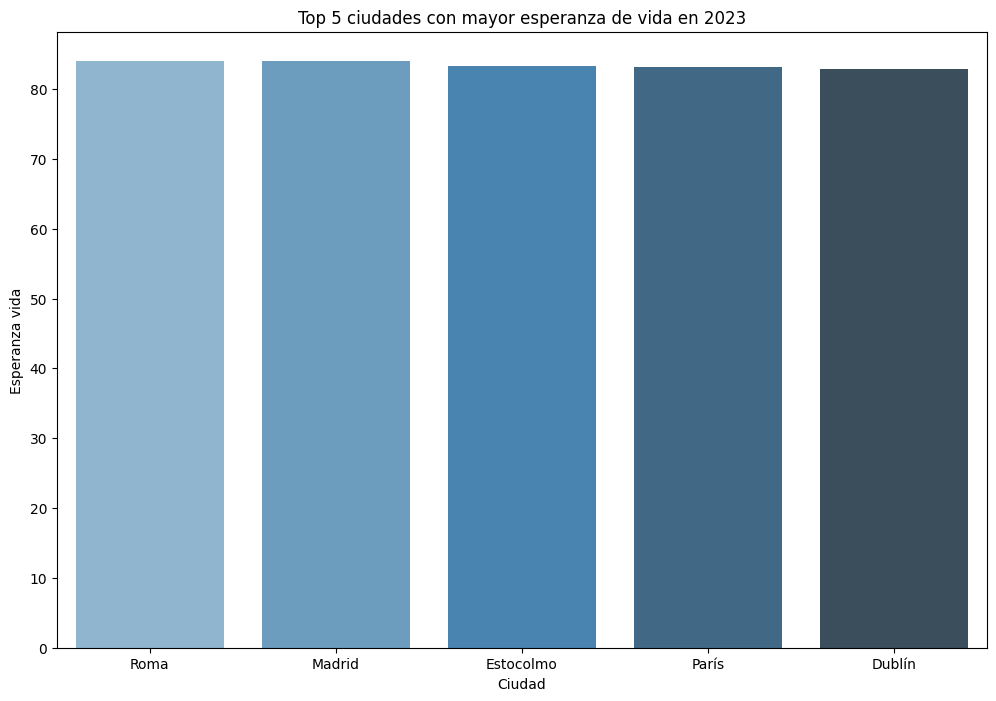

In [74]:
df_sanidad_esperanza = df[df['Año'] == 2023] # Nos quedamos con el año 2023

df_sanidad_esperanza = df_sanidad_esperanza.sort_values(by=['Esperanza vida'], ascending=False) # Ordenamos de mayor a menor

df_sanidad_esperanza = df_sanidad_esperanza[['Ciudad', 'Esperanza vida']] # Nos quedamos con las columnas que nos interesan

df_sanidad_esperanza.head() # Mostamos las 5 primeras

plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Esperanza vida', data=df_sanidad_esperanza.head(), palette='Blues_d')

plt.title('Top 5 ciudades con mayor esperanza de vida en 2023')

plt.show();

Dos de las ciudades con mejor índice de sanidad, entran en el top 5 de ciudades con más esperanza de vida en 2023.

Entonces, ¿qué mas cosas afectan a la esperanza de vida?

In [75]:
# Variables altamente correlacionadas con la esperanza de vida (> 0.5)

df.corr()['Esperanza vida'][df.corr()['Esperanza vida'] > 0.5]

Índice de Costo de Vida_x            0.686969
Índice de Alquiler                   0.674715
Índice de Comestibles                0.652574
Índice de Precios en Restaurantes    0.690465
Índice de Poder Adquisitivo          0.571926
Esperanza vida                       1.000000
Name: Esperanza vida, dtype: float64

In [76]:
# Variables altamente correlacionadas de manera inversa con la esperanza de vida (< - 0.5)

df.corr()['Esperanza vida'][df.corr()['Esperanza vida'] < -0.5]

Series([], Name: Esperanza vida, dtype: float64)

In [77]:
# Variables levemente correlacionadas con la esperanza de vida (> 0.3) ---->  Variables a incluir en el modelo

df.corr()['Esperanza vida'][df.corr()['Esperanza vida'] > 0.3]

Índice de Costo de Vida_x            0.686969
Índice de Alquiler                   0.674715
Índice de Comestibles                0.652574
Índice de Precios en Restaurantes    0.690465
Índice de Poder Adquisitivo          0.571926
Índice de Sanidad                    0.406414
Esperanza vida                       1.000000
Name: Esperanza vida, dtype: float64

In [78]:
# Variables levemente correlacionadas inversamente con la esperanza de vida (< -0.3)

df.corr()['Esperanza vida'][df.corr()['Esperanza vida'] < -0.3]

Series([], Name: Esperanza vida, dtype: float64)

Se observa que otras de las variables que más correlación mantienen con la esperanza de vida son los indices de alquiler, comestibles y precios en restaurantes.  
Cabe pensar que cuanto mejor sea el hogar en el que vivimos, mayor esperanza de vida tendremos ya que esto aumentará nuestra calidad de vida. Por otro lado, los precios de los restaurantes y los comestibles, atienden a la calidad en los alimentos, es decir, cuanto menos comida basura comamos, mayor esperanza de vida tendremos. Por ende, todo esto hará que aumente el coste de la vida, pero como vemos, un mayor coste de vida hará que aumente la esperanza de la misma.

#### ¿Y que ocurre con la contaminacion frente a la esperanza de vida?

In [94]:
df.corr()['Esperanza vida']['Índice de Contaminación']

-0.1687132609721897

La correlación, si bien es muy bajita, como era de esperar es indirecta. Es evidente que a mayor contaminación, menor esperanza de vida.  


#### ¿Y con la calidad de vida en general?

In [95]:
df.corr()['Esperanza vida']['Índice de Calidad de Vida']

0.2725221591309262

Como era de esperar, mantienen una relación positiva. A mayor calidad de vida, mayor esperanza de vida.  
Además, es cierto que al calcular el índice de calidad de vida de no se tiene en cuenta la esperanza de vida, por este motivo la correlación sale tan baja, pero existente.

### Análisis adicional sobre la contaminación

#### Ya que tenemos la información sobre el desplazamiento en tráfico, vamos a ver la relación que mantiene con el índice de contaminación.

In [81]:
df.corr()['Índice de Tiempo de Desplazamiento en Tráfico']['Índice de Contaminación']

0.4904874763663829

Como era de esperar, la relación que mantienen es positiva. Es decir, a mayor tiempo de tráfico, mayor contaminación.

In [82]:
df.corr()['Índice de Contaminación'][df.corr()['Índice de Contaminación'] > 0.4]

Índice de Tiempo de Desplazamiento en Tráfico    0.490487
Índice de Contaminación                          1.000000
Name: Índice de Contaminación, dtype: float64

De hecho, se observa que el tiempo de tráfico es la variable que más afecta a la contaminación positivamente.

In [83]:
df.corr()['Índice de Contaminación'][df.corr()['Índice de Contaminación'] < -0.5]

Índice de Calidad de Vida   -0.731745
Índice de Seguridad         -0.511733
Name: Índice de Contaminación, dtype: float64

Otra de las variables que más afectan a la contaminación, es la seguridad. Seguramente las ciudades que cuentan con un numero mas limitado de policias, provoca que no se tengan oficiales suficientes asignados a controlar los índices de contaminación de los vehículos para inmovilizarlos. Además, actualmente hay muchas ciudades europeas que cuentan con zonas de bajas emisiones que son controladas por los policias. Si no se cuenta con un numero suficiente de policias que controlen estas zonas, probablemente los vehículos accedan a ellas y, por tanto, aumente la contaminación.

### Coste de vida

A continuación, vamos a realizar un estudio sobre el coste de vida en las capitales europeas. Para ello, tendremos en cuenta las siguientes variables:  
- Índice de Alquiler: Mide el coste relativo del alquiler de viviendas en una ciudad en comparación con otra.
- Índice de Comestibles: Indica la diferencia de costes en la alimentación (supermercados) entre ciudades.
- Índice de Precios en Restaurantes: Compara los precios de restaurantes y bares en diferentes ciudades.

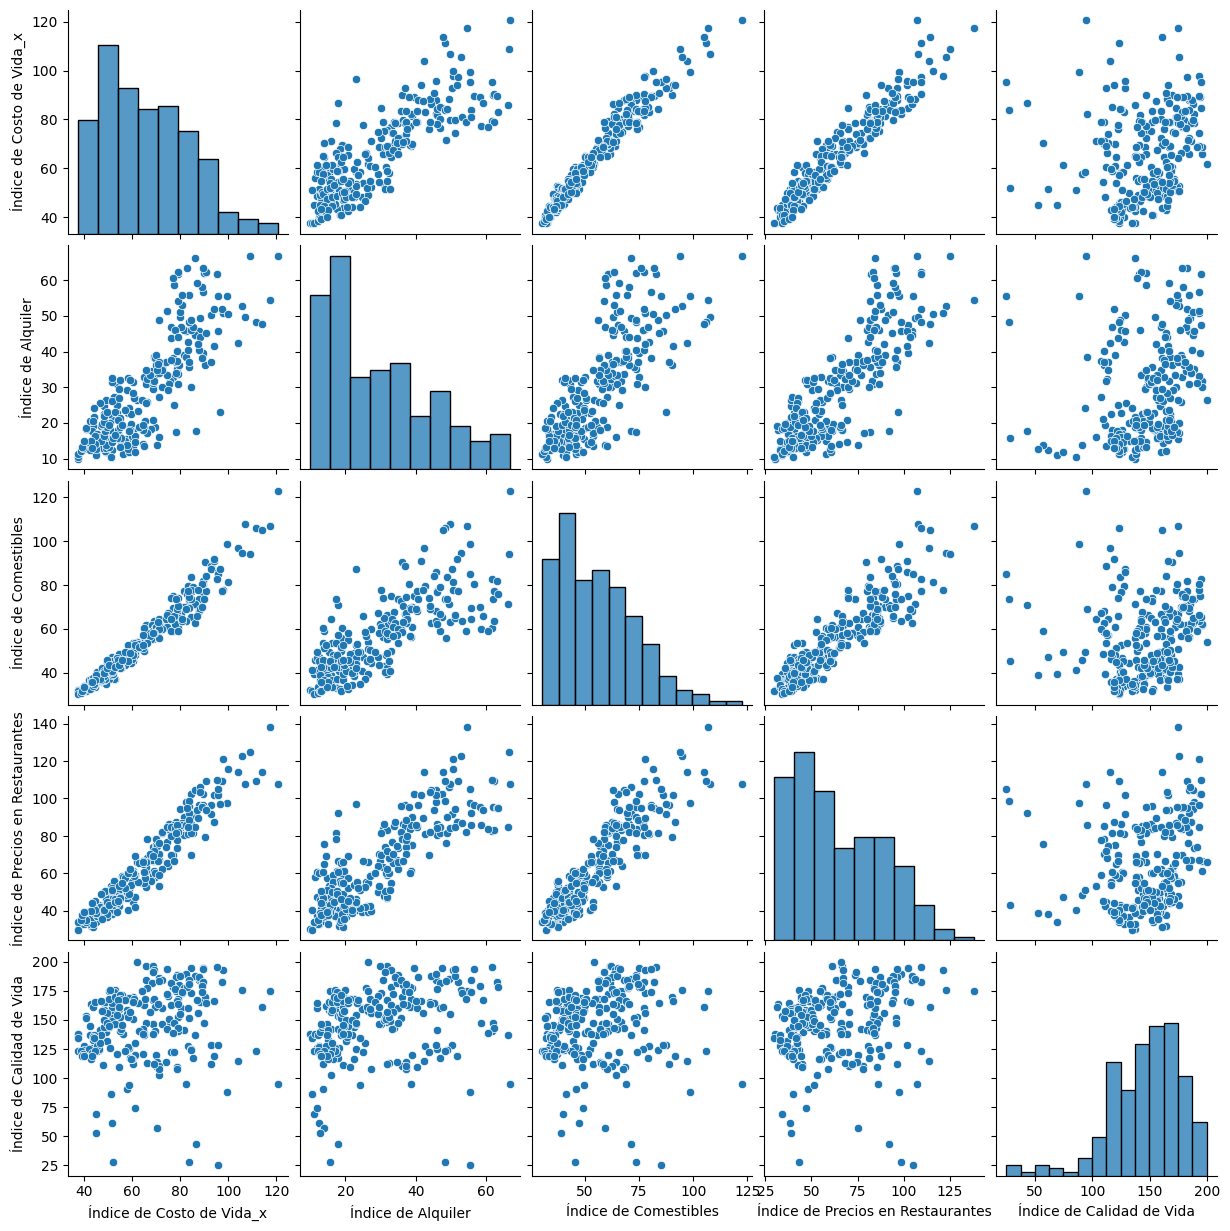

In [74]:
# Representación gráfica general

df_coste= df[df['Año']==2023]

df_coste = df.iloc[:, 2:7]

sns.pairplot(df_coste)
plt.show()

A través del gráfico anterior, de nuevo podemos hacernos una idea general de cómo afectan las  variables (Índice de Alquiler, Índice de Comestibles e Índice de Precios en Restaurantes) al coste  de vida. Se observa que el coste de vida viene afectada por una tendencia fuertemente positiva por todas las variables anteriormente señaladas, destacando sobre todo el Índice de Comestibles, cuya distribución presenta una agrupación ascendente bastante sólida y lineal.

#### Top 5 ciudades con mayor coste de vida en 2023

In [75]:
df_top_cost = df[df['Año'] == 2023] # Seleccionamos el año 2023

df_top_cost = df_top_cost.sort_values(by=['Índice de Costo de Vida_x'], ascending=False) # Ordenamos de mayor a menor

df_top_cost= df_top_cost[['Ciudad', 'Índice de Costo de Vida_x']] # Nos quedamos con las columnas que nos interesan

df_top_cost.head() # Mostamos las 5 primeras

,Ciudad,Índice de Costo de Vida_x
59,Copenhague,82.26
129,Dublín,77.06
89,París,76.06
169,Luxemburgo,74.61
179,Ámsterdam,71.38


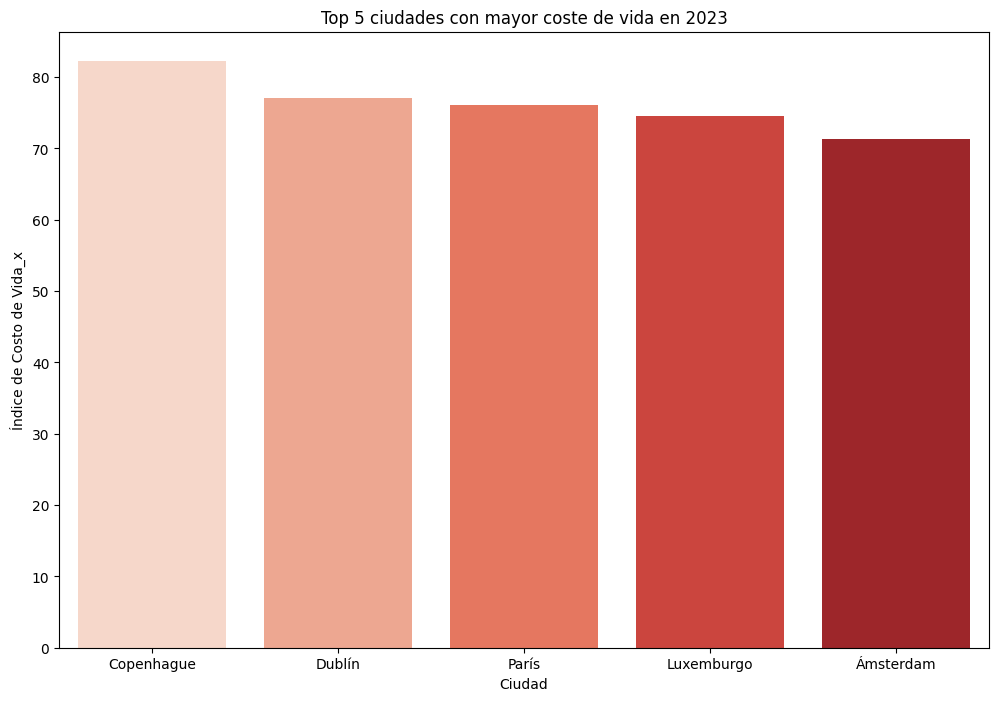

In [76]:
# Hacemos un gráfico de barras para representar el top 5 ciudades con mayor coste de vida. 
plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Índice de Costo de Vida_x', data=df_top_cost.head(), palette='Reds')

plt.title('Top 5 ciudades con mayor coste de vida en 2023')

plt.show();

#### ¿Qué afecta más al coste de vida?

In [77]:
# Sacamos las variables que mantienen una correlación con respecto al índice de la calidad de vida superior al 0.5
# primero creamos una matriz de correlacion: df_coste.corr()
# dentro de la matriz, accedemos a la columna 'Índice de Costo de Vida_x ': df_coste.corr()['Índice de Costo de Vida_x ']
# dentro de la columna, filtramos los valores superiores a 0.5: df_coste.corr()['Índice de Costo de Vida_x '][df_coste.corr()['Índice de Costo de Vida_x '] > 0.5]


df_coste.corr()['Índice de Costo de Vida_x'][df_coste.corr()['Índice de Costo de Vida_x'] > 0.5] 

Índice de Costo de Vida_x            1.000000
Índice de Alquiler                   0.830869
Índice de Comestibles                0.973919
Índice de Precios en Restaurantes    0.958743
Name: Índice de Costo de Vida_x, dtype: float64

In [78]:
# Sacamos las variables que mantienen una correlación con respecto al índice de la calidad de vida inferior al - 0.5

df_coste.corr()['Índice de Costo de Vida_x'][df_coste.corr()['Índice de Costo de Vida_x'] < - 0.5]

# Al ser todas las correlaciones del costo positivas. 

Series([], Name: Índice de Costo de Vida_x, dtype: float64)

La variable que mantiene una mayor conexión con el índice de costo de vida, es el índice de comestibles, es decir el precio de los productos alimenticios en medianas y grandes superficies, seguida del coste de comer en restaurantes. Le sigue el alquiler, que en un principio podriamos suponer que sería la que más influiríaa. Aunque es cierto que la diferencia es mínima y que según Pearson tienen una fuerte correlación.

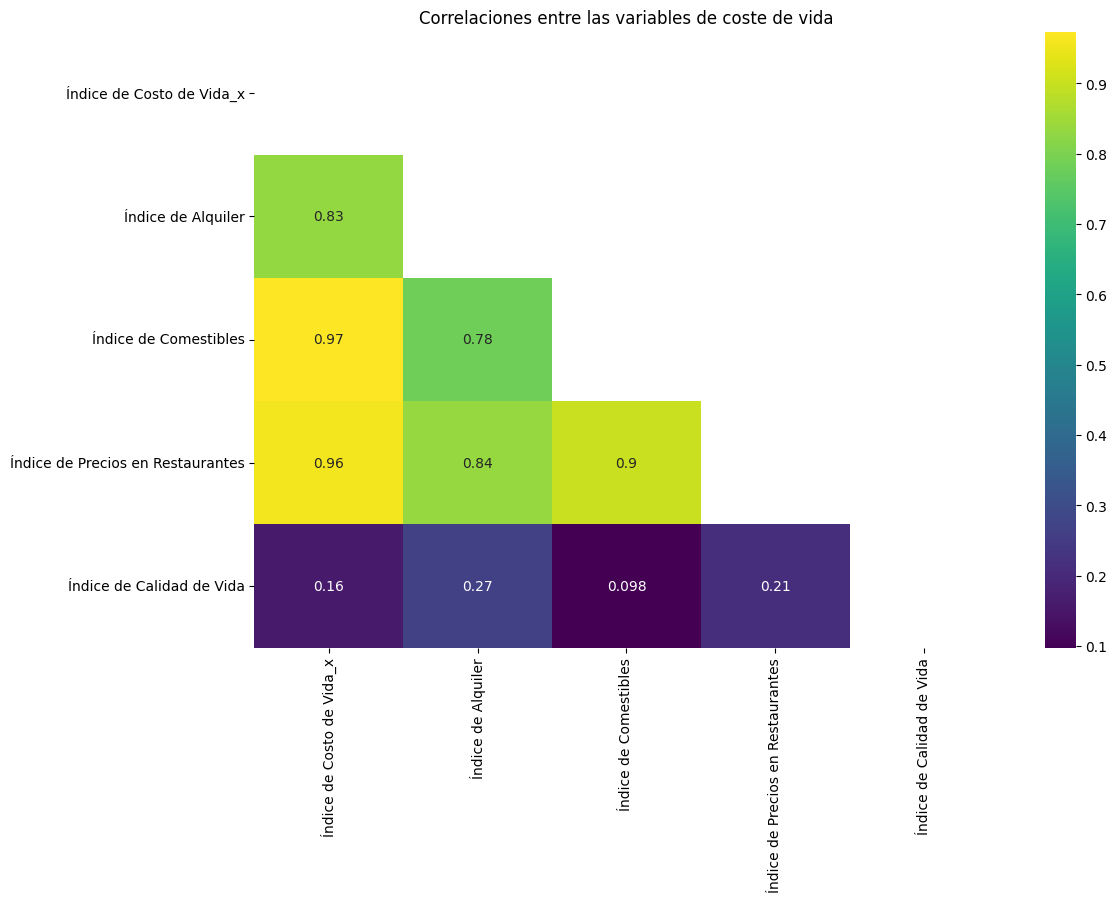

In [79]:
import numpy as np

# Mapa de calor con las correlaciones

plt.figure(figsize=(12, 8))

sns.heatmap(df_coste.corr(), annot=True, cmap='viridis',  mask=np.triu(df_coste.corr()))

plt.title('Correlaciones entre las variables de coste de vida')

plt.show();

#### Top 5 ciudades con mayor índice de alquiler

In [80]:
df_top_alquiler = df[df['Año'] == 2023] # Seleccionamos el año 2023

df_top_alquiler = df_top_alquiler.sort_values(by=['Índice de Alquiler'], ascending=False)

df_top_alquiler= df_top_alquiler[['Ciudad', 'Índice de Alquiler']]

df_top_alquiler.head()

,Ciudad,Índice de Alquiler
129,Dublín,60.66
169,Luxemburgo,51.24
179,Ámsterdam,48.70
59,Copenhague,45.80
89,París,43.71


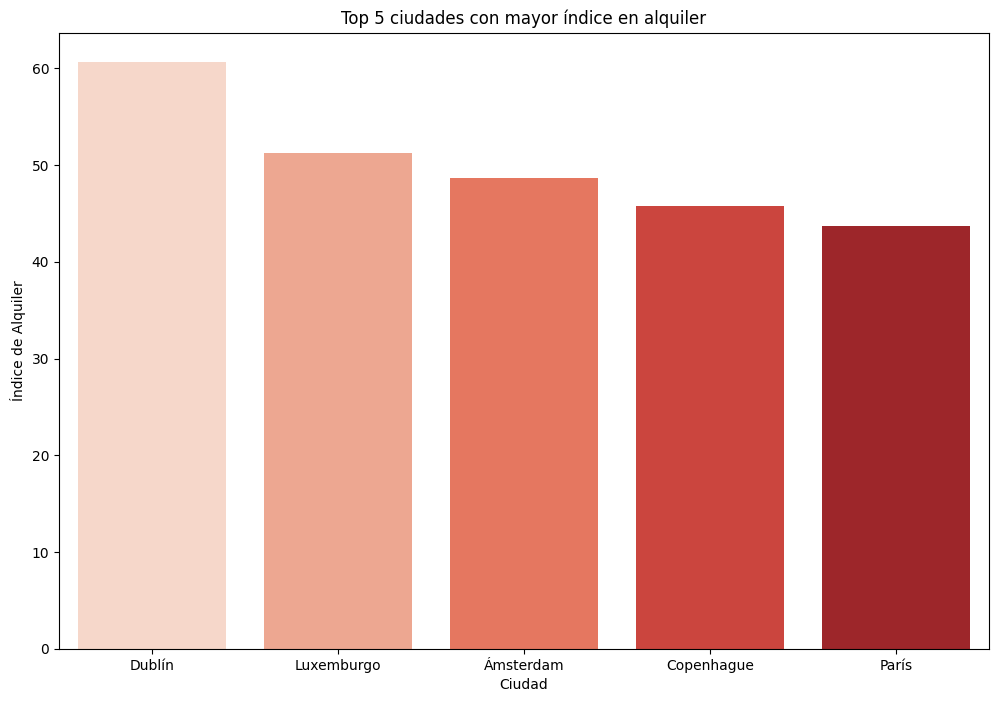

In [81]:
# Graficar

plt.figure(figsize=(12, 8))
sns.barplot(x='Ciudad', y='Índice de Alquiler', data=df_top_alquiler.head(), palette='Reds')

plt.title('Top 5 ciudades con mayor índice en alquiler')

plt.show();

In [82]:
# Agrupamos y hacemos la medía. Para sacar la media de datos historicos del índice de alquiler. 
media_alquiler_ciudad = df.groupby("Ciudad")["Índice de Alquiler"].mean()

# Ordenamos las ciudades por la media histórica de alquiler en orden descendente
media_alquiler_ciudad.sort_values(ascending=False).head()

Ciudad
Luxemburgo    58.103
Dublín        56.281
Ámsterdam     51.701
París         49.854
Copenhague    48.238
Name: Índice de Alquiler, dtype: float64

#### Top 5 ciudades con mayor indice de costo en alimentación

In [83]:
df_comer = df_cost.copy() #Copia del df_cost para r que país tiene mayor incide de coste en alimentacion general. 

In [84]:
df_comer['Suma Comida'] = df_comer['Índice de Comestibles'] + df_comer['Índice de Precios en Restaurantes'] 
#Nueba columna en el df_cost que suma ambos índices

In [85]:
#Sacamos el top_5

df_top_comer = df_comer[df_comer['Año'] == 2023] 

df_top_comer = df_top_comer.sort_values(by=['Suma Comida'], ascending=False) 

df_top_comer= df_top_comer[['Ciudad', 'Suma Comida']] 

df_top_comer.head()

,Ciudad,Suma Comida
59,Copenhague,161.93
171,Luxemburgo,151.05
89,París,144.04
131,Dublín,143.01
79,Helsinki,133.16


In [86]:
df_top_comestible = df[df['Año'] == 2023] 

df_top_comestible  = df_top_comestible .sort_values(by=['Índice de Comestibles'], ascending=False) 

df_top_comestible = df_top_comestible [['Ciudad', 'Índice de Comestibles']] 

df_top_comestible .head()

,Ciudad,Índice de Comestibles
89,París,74.23
169,Luxemburgo,66.35
59,Copenhague,63.62
249,Estocolmo,63.14
129,Dublín,59.09


In [87]:
df_top_restaurante = df[df['Año'] == 2023] 

df_top_restaurante = df_top_restaurante.sort_values(by=['Índice de Precios en Restaurantes'], ascending=False) 

df_top_restaurante= df_top_restaurante[['Ciudad', 'Índice de Precios en Restaurantes']]

df_top_restaurante.head() 

,Ciudad,Índice de Precios en Restaurantes
59,Copenhague,98.31
169,Luxemburgo,84.70
129,Dublín,83.92
179,Ámsterdam,76.15
79,Helsinki,74.19


In [91]:
import plotly.express as px

fig1 = px.bar(df_top_comestible.head(), x='Ciudad', y='Índice de Comestibles', title='Top 5 Ciudades - Índice de Comestibles en 2023', color_discrete_sequence=['#FFB6C9'])
fig2 = px.bar(df_top_restaurante.head(), x='Ciudad', y='Índice de Precios en Restaurantes', title="Top 5 Ciudades - Índice de Precios en Restaurantes en 2023", color_discrete_sequence=['#FFB6C1'])

fig1.show();
fig2.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Centrándonos en top 5 de ciudades que poseen mayor costo de vida:

- Copenhague: se sitúa a la cabeza en cuanto a coste de vida se refiere(82,6 %), aunque su índice de alquiler no se encuentra dentro del top 3, en cuanto a la alimentación es el país que más costo abarca. Además, atendiendo a que la correlación positiva más influyente se centra en la alimentación, justifica que se encuentre en el top1.


- Dublín: le sigue dublin con un 77,06 %. En este caso, cuenta con el mayor indice en alquiler del top. Esto se debe a que la ciudad es un importante centro económico y cultural, gran atractivo para residentes, estudiantes y profesionales del sector tecnológico al ser conocida como uno de los grandes centros tecnológicos de Europa. Además se encuentra dentro del top en referencia a la alimentación. Por lo que también justifica que se encuentre en la posición2. 

- París: es la tercera capital europea en cuanto al coste de vida (76%). A pesar de encontrarse en la cola del top5 de alquiler, es una ciudad muy cara referiendonos a la alimentación cotidiana, con uno de los precios más alto en alimentos de primera necesidad, lo cual justifica que se encuentre dentro de este top. 

- Luxemburgo: en este caso en la cuarta posición Luxemburgo, con un 74,6 %. Se mantiene siempre dentro del top 3 en alusión a nuestras variables. Esto se debe a la prosperidad económica y el alto nivel de vida, puesto que es uno de los más importante centros financieros de Europa y que posee unos de los ingresos per cápita más altos del mundo. 

- Amsterdam: se encuentra en la quinta posición con un 71,3 %. Destaca en su alto indice de alquiler debido a su alto atractivo tanto para residentes como turistas. Además la ciudad tiene limitaciones geográfica por lo que supone un problema debido a las restricciones a la hora de construir, motivo que nos justifica ese alto coste en el alquiler. 

#### ¿Cómo se relacionan la calidad de vida y el coste de vida?

In [99]:
df.corr()['Índice de Calidad de Vida']['Índice de Costo de Vida_x']

0.15832739465535406

La calidad de vida y el coste de la vida mantienen una relación positiva. Esto se debe a que cuanto más gastemos para obtener mejor calidad tanto en nuestro hogar, en productos alimenticios, en coches de bajas emisiones, etc. mayor calidad de vida tendremos.

## Modelos de predicción

El presente trabajo contempla dos modelos predictivos, ambos relativos a la esperanza de vida.  
Por un lado, se ha creado un modelo de predictivo de series temporales en Azure, para determinar la esperanza de vida en cada una de las capitales en 2024.  
Y por otro lado, el segundo modelo es de regresión (aplicación en streamlit) y se ha hecho con el objetivo de obtener una calculadora de la esperanza de vida. Así, los usuario pueden insertar la información correspondiente y obtener una estimación de su esperanza de vida atendiendo a los factores tratados anteriormente.

### Modelos predictivo de series temporales con Azure (Time series forecasting): Esperanza de Vida 2024

In [96]:
# Verificamos rápidamente que no haya nulos

df_life_exp.isnull().sum()

Ciudad            0
Año               0
Esperanza vida    0
dtype: int64

In [98]:
# Guardamos el archivo en csv para trabajar con él en Azure

df_life_exp.to_csv('inputs/df_life_exp.csv', index=False)

In [99]:
# Primero, vamos a visualizar la evolución de la esperanza de vida hasta 2023 empezando por 2014

import plotly.express as px

fig = px.line(df_life_exp, x='Año', y='Esperanza vida', color='Ciudad', title='Evolución de la esperanza de vida en las capitales europeas (2014-2023)')

fig.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [103]:
df_life_exp

,Ciudad,Año,Esperanza vida
0,Bruselas,2014,81.40
1,Sofía,2014,74.50
2,Copenhague,2014,80.70
3,Berlín,2014,81.20
4,Tallin,2014,77.40
...,...,...,...
265,Liubliana,2023,81.85
266,Bratislava,2023,78.00
267,Helsinki,2023,82.48
268,Estocolmo,2023,83.33


In [104]:
# Lista de paises con esperanza de vida menor a 80 años

paises_menos_80 = df_life_exp[df_life_exp['Esperanza vida'] < 80]['Ciudad'].unique()

paises_menos_80

array(['Sofía', 'Tallin', 'Zagreb', 'Riga', 'Vilna', 'Budapest',
       'Varsovia', 'Bucarest', 'Bratislava', 'Praga'], dtype=object)

Nos encontramos frente a un gráfico lineal múltiple que ilustra la evolución de la esperanza de vida en las capitales europeas desde el año 2014 hasta el 2023.  
 
Evidentemente, se distinguen dos grupos claramente diferenciados en la gráfica. En la parte superior, encontramos las ciudades con una mayor esperanza de vida, destacando metrópolis como Madrid, Roma, Estocolmo, París, Luxemburgo y Malta, las cuales no bajan de los 80 años. En contraste, la parte inferior de la gráfica representa ciudades con una esperanza de vida inferior, entre ellas Riga, Vilna, Bucarest, Sofía, Tallin y Zagreb, con tasas que no superan los 75 años. Vale la pena señalar que, aunque se evidencia una diferenciación, esta sería aún más marcada si se incluyeran ciudades de países subdesarrollados.  
 
Dada esta división, exploraremos las principales causas que explican esta variación, basándonos en los datos proporcionados por el portal estadístico del Sistema Nacional Sanitario (SNS) del Ministerio de Sanidad, Servicios Sociales e Igualdad.  
Para comprender lo representado en el gráfico, es esencial comenzar hablando de los países con una mayor Mortalidad General por cada 100,000 habitantes. Ciudades como Sofía, Vilna, Riga y Bucarest sobresalen considerablemente en este aspecto, en marcado contraste con ciudades con menor índice, como París, Luxemburgo o Madrid. Similarmente, la Mortalidad Infantil por cada 1,000 nacidos vivos muestra cifras preocupantes para Bucarest y Sofía, con 7 y 14 defunciones por cada mil nacidos vivos, respectivamente.   
 
Un factor de gran influencia es el de los hábitos de vida. En este ámbito, ciudades como Sofía, Budapest, Riga o Tallin destacan por tener un mayor porcentaje de población fumadora mayor a 15 años. Lo mismo ocurre con el consumo de alcohol, dos de las drogas legales que más contribuyen a las muertes en la población.  
 
En cuanto al acceso a la atención médica, ciudades como Tallin, Bucarest y Riga tienen un alto porcentaje de población que declara necesidades no satisfechas de atención médica debido a barreras económicas, geográficas o largas listas de espera. Por otro lado, ciudades como Viena, Madrid o Luxemburgo reportan altos niveles de satisfacción.  
 
En lo que respecta al gasto sanitario público y privado, países como Francia, Alemania y Suecia destacan al destinar un 11.3%, 11.2% y 11% de su PIB a la sanidad, respectivamente. En contraste, Rumanía, Letonia y Estonia asignan un menor porcentaje del PIB, con valores de 5.2%, 6% y 6.4%, respectivamente.  
 
Analizando la evolución histórica de las ciudades, todas muestran un pronunciado descenso a partir de 2019, acentuándose en 2021 debido a la crisis sanitaria mundial del Covid-19. Sofía (Bulgaria) y Bucarest (Rumania) experimentaron las mayores caídas, atribuibles a una estructura sanitaria deficiente y dificultades en el acceso a vacunas. Estos factores explican el marcado descenso en estas ciudades.
Posterior al año 2021, se observa un aumento en la esperanza de vida, marcado por la generalización de la vacunación entre personas mayores de 65 años, lo que contribuyó a estabilizar la esperanza de vida en valores similares a los previos a la pandemia.  
  
En resumen, la variación en la esperanza de vida en las capitales europeas se debe a una combinación de factores, incluidos la salud general de la población, los hábitos de vida, el acceso a la atención médica y la respuesta a crisis sanitarias como la del Covid-19. La vacunación masiva ha demostrado ser un factor crucial para revertir las tendencias negativas observadas durante la pandemia.  

#### Predicción para el año 2024

Una vez tratado con el modelo en el Notebook_modelo_series, procedemos a visualizar la predicción para el 2024.

^ *este modelo se ha tenido que leer de manera individual, en un entorno Python compatible con nuestro modelo Azure ML.*

In [100]:
df_2024 = pd.read_csv('df_life_exp_2024.csv')

In [101]:
# Gráfico mostrando los resultado de la predicción

fig = px.line(df_2024, x='Año', y='Esperanza vida', color='Ciudad', title='Evolución de la esperanza de vida y predicción para 2024 en las capitales europeas')

fig.update_layout(
    autosize=False,
    width=1500,
    height=900,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Ciudades que más van a aumentar su esperanza de vida en 2024

In [102]:
# Calculamos el porcentaje de incremento de la esperanza de vida para cada ciudad y años 2023-2024

df_incrementos = df_2024[df_2024['Año'] >= 2023]

df_incrementos



,Ciudad,Año,Esperanza vida
243,Bruselas,2023,82.170000
244,Sofía,2023,75.490000
245,Copenhague,2023,81.400000
246,Berlín,2023,81.880000
247,Tallin,2023,79.180000
248,Dublín,2023,82.810000
249,Atenas,2023,82.800000
250,Madrid,2023,83.990000
251,París,2023,83.130000
252,Zagreb,2023,79.020000


In [103]:
# Creamos un bucle para crear una nueva columna en df_incrementos con el porcentaje de incremento de la esperanza de vida para cada ciudad y cada año correspondiente a esa ciudad

for ciudad in df_incrementos['Ciudad'].unique():
    df_incrementos.loc[df_incrementos['Ciudad'] == ciudad, 'Incremento'] = df_incrementos[df_incrementos['Ciudad'] == ciudad]['Esperanza vida'].pct_change()

df_incrementos = df_incrementos[df_incrementos['Año'] == 2024]

df_incrementos


,Ciudad,Año,Esperanza vida,Incremento
270,Bruselas,2024,81.607096,-0.006850
271,Sofía,2024,74.379191,-0.014715
272,Copenhague,2024,81.179752,-0.002706
273,Berlín,2024,81.078166,-0.009793
274,Tallin,2024,78.277616,-0.011397
275,Dublín,2024,82.221217,-0.007110
276,Atenas,2024,81.419914,-0.016668
277,Madrid,2024,83.359187,-0.007511
278,París,2024,82.662611,-0.005622
279,Zagreb,2024,77.962272,-0.013386


In [105]:
# ¿Cuales son las ciudades que aumentarán la esperanza de vida?

df_incrementos[df_incrementos['Incremento'] >= 0]


,Ciudad,Año,Esperanza vida,Incremento
281,Nicosia,2024,82.110754,0.007370
296,Praga,2024,78.702876,0.006045


In [106]:
# ¿Cuales son las ciudades que más disminuiran la esperanza de vida?

df_incrementos[df_incrementos['Incremento'] < 0].sort_values(by='Incremento').head()



,Ciudad,Año,Esperanza vida,Incremento
289,Varsovia,2024,77.547599,-0.021728
291,Bucarest,2024,75.000234,-0.019605
285,Budapest,2024,76.010915,-0.016804
276,Atenas,2024,81.419914,-0.016668
271,Sofía,2024,74.379191,-0.014715


## Aplicación de Streamlit: predicción de la esperanza de vida mediante de un modelo de regresión

In [107]:
# Antes de crear el modelo, vamos a crear una copia del df original ya que en este caso si que vamos a tratar los outliers, de cara a que no impacten en las predicciones. Además, tambien trataremos los valores nulos.


df_model = df.copy()


In [108]:
# Se reemplazan los nulos con la moda, mediana o media.
def replace_missing_data(df_model):
# Vemos qué columnas tienen valores nulos
    mis_cols = list(df_model.isnull().sum(axis=0)[df_model.isnull().sum(axis=0)>0].index)
 
# Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df_model[col].dtype in ['object']:
            mode_col = df_model[col].mode().values[0]
            df_model[col] = df_model[col].fillna(mode_col)
        # Si son números enteros
        elif df_model[col].dtype in ['int']:
            df_model[col] = df_model[col].fillna(df_model[col].median())
        # Si son números reales
        elif df_model[col].dtype in ['float']:
            df_model[col] = df_model[col].fillna(df_model[col].mean())
    # Devolvemos el DataFrame
    return df_model

In [109]:
df_model = replace_missing_data(df_model)

In [110]:
df_model.isnull().sum()

Ciudad                                           0
Año                                              0
Índice de Costo de Vida_x                        0
Índice de Alquiler                               0
Índice de Comestibles                            0
Índice de Precios en Restaurantes                0
Índice de Calidad de Vida                        0
Índice de Poder Adquisitivo                      0
Índice de Seguridad                              0
Índice de Sanidad                                0
Relación Precio/Ingresos para Propiedades        0
Índice de Tiempo de Desplazamiento en Tráfico    0
Índice de Contaminación                          0
Esperanza vida                                   0
dtype: int64

In [111]:
# Visualizacion de outliers

def outliers1 (df_model):
     for columnas in df_model:
         Q1 = df_model[columnas].quantile(0.25)
         Q3 = df_model[columnas].quantile(0.75)
         IQR = Q3 - Q1
         outlierIzq = Q1-(1.5*IQR)
         outlierDer = Q3+(1.5*IQR)
         outliers = df_model[columnas][(df_model[columnas] < outlierIzq) | (df_model[columnas] > outlierDer)]
         print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers")
    
outliers1(df_model.iloc[:, 2:])


La variable Índice de Costo de Vida_x tiene 0 valores outliers
La variable Índice de Alquiler tiene 0 valores outliers
La variable Índice de Comestibles tiene 5 valores outliers
La variable Índice de Precios en Restaurantes tiene 0 valores outliers
La variable Índice de Calidad de Vida tiene 7 valores outliers
La variable Índice de Poder Adquisitivo tiene 0 valores outliers
La variable Índice de Seguridad tiene 0 valores outliers
La variable Índice de Sanidad tiene 0 valores outliers
La variable Relación Precio/Ingresos para Propiedades tiene 11 valores outliers
La variable Índice de Tiempo de Desplazamiento en Tráfico tiene 2 valores outliers
La variable Índice de Contaminación tiene 0 valores outliers
La variable Esperanza vida tiene 0 valores outliers


In [112]:
# Tratamiento de outliers

columnas_a_limpiar = df_model[['Índice de Comestibles', 'Índice de Calidad de Vida', 'Relación Precio/Ingresos para Propiedades', 'Índice de Tiempo de Desplazamiento en Tráfico']]

def reemplazar_outliers_iqr(df_model, columnas_a_limpiar):
    """
    Reemplazamos los outliers del  df usando el método IQR. 
    """
    for columna in columnas_a_limpiar:
        Q1 = df_model[columna].quantile(0.25)
        Q3 = df_model[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_model[(df_model[columna] < (Q1 - 1.5 * IQR)) | (df_model[columna] > (Q3 + 1.5 * IQR))]
        df_model[columna] = np.where(df_model[columna] < (Q1 - 1.5 * IQR), Q1, df_model[columna])
        df_model[columna] = np.where(df_model[columna] > (Q3 + 1.5 * IQR), Q3, df_model[columna])
        
    return df_model
df_model = reemplazar_outliers_iqr(df_model, columnas_a_limpiar)


In [113]:
from sklearn.model_selection import train_test_split

# Para el modelo, utilizaremos las variables que anteriormente hemos visto que estan altamente o levemente correlacionadas con la esperanza de vida.

# Dividimos el conjunto en prueba y entrenamiento

X = df_model[['Índice de Alquiler', 'Índice de Comestibles', 'Índice de Precios en Restaurantes', 'Índice de Poder Adquisitivo', 'Índice de Sanidad']]
y = df_model['Esperanza vida']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=26)

In [114]:
#Librerías
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm

#Inicializamos modelo y parámetros. En nuestro caso, hemos decidido utilizar el modelo Support Vector Regression ya que el error cuadrático medio es menor que con otros modelos como el de regresión lineal.

C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model_svr = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model_svr.fit(X_train, y_train)
mse_SVR = mse(y_test,model_svr.predict(X_test))
print(mse_SVR)

1.981572607085751


#### Predicción aleatoria para comprobar el modelo

In [115]:
X.columns

Index(['Índice de Alquiler', 'Índice de Comestibles',
       'Índice de Precios en Restaurantes', 'Índice de Poder Adquisitivo',
       'Índice de Sanidad'],
      dtype='object')

In [116]:
esperanza_vida = [[35, 70, 50, 90, 20]]

In [117]:
prediction = model_svr.predict(esperanza_vida)

In [118]:
prediction

array([80.90641931])

In [119]:
probability = prediction[0]

In [120]:
probability

80.90641930913925

In [121]:
# Guardamos el modelo

import pickle

pickle.dump(model_svr, open('modelo_svr.pkl', 'wb'))

modelo_svr = pickle.load(open('modelo_svr.pkl', 'rb'))

### Preparacion ficheros para Power BI

In [122]:
df

,Ciudad,Año,Índice de Costo de Vida_x,Índice de Alquiler,Índice de Comestibles,Índice de Precios en Restaurantes,Índice de Calidad de Vida,Índice de Poder Adquisitivo,Índice de Seguridad,Índice de Sanidad,Relación Precio/Ingresos para Propiedades,Índice de Tiempo de Desplazamiento en Tráfico,Índice de Contaminación,Esperanza vida
0,Viena,2014,90.16,36.22,90.45,79.49,169.65,94.09,70.09,77.78,12.51,25.33,25.18,81.60
1,Viena,2015,77.02,32.92,74.92,70.06,178.28,100.22,69.48,80.79,13.30,24.86,25.02,81.30
2,Viena,2016,65.87,31.86,61.57,61.04,195.97,119.81,71.96,78.80,16.72,26.28,21.17,81.80
3,Viena,2017,68.59,29.94,62.23,66.64,195.78,98.50,78.19,81.05,13.68,25.55,18.97,81.70
4,Viena,2018,78.64,35.04,73.80,73.39,188.60,98.88,77.38,77.96,14.08,26.03,18.97,81.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Nicosia,2019,64.65,18.01,57.12,66.36,142.27,60.65,70.67,49.65,7.98,21.94,60.66,82.30
256,Nicosia,2020,62.73,18.83,51.59,65.67,140.77,55.50,70.11,52.24,6.97,26.15,59.59,82.40
257,Nicosia,2021,68.78,20.77,58.21,69.29,137.88,57.01,67.49,52.37,5.24,26.15,64.62,81.30
258,Nicosia,2022,64.53,19.34,52.57,65.96,137.87,60.28,67.34,50.72,6.01,25.25,65.67,81.70


In [123]:
df.isnull().sum()

Ciudad                                            0
Año                                               0
Índice de Costo de Vida_x                         0
Índice de Alquiler                                0
Índice de Comestibles                             0
Índice de Precios en Restaurantes                 0
Índice de Calidad de Vida                        13
Índice de Poder Adquisitivo                      13
Índice de Seguridad                              13
Índice de Sanidad                                13
Relación Precio/Ingresos para Propiedades        13
Índice de Tiempo de Desplazamiento en Tráfico    13
Índice de Contaminación                          13
Esperanza vida                                    0
dtype: int64

In [124]:
df.dropna(inplace=True)

In [125]:
df.isnull().sum()

Ciudad                                           0
Año                                              0
Índice de Costo de Vida_x                        0
Índice de Alquiler                               0
Índice de Comestibles                            0
Índice de Precios en Restaurantes                0
Índice de Calidad de Vida                        0
Índice de Poder Adquisitivo                      0
Índice de Seguridad                              0
Índice de Sanidad                                0
Relación Precio/Ingresos para Propiedades        0
Índice de Tiempo de Desplazamiento en Tráfico    0
Índice de Contaminación                          0
Esperanza vida                                   0
dtype: int64

In [126]:
df.to_csv('df_BI.csv', index=False)

In [127]:
df_incrementos.to_csv('df_incrementos.csv', index=False)